# Exploration of the data of 1.88 million wildfires in the US

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
plt.rcParams['figure.figsize'] = [8.0, 6.0]

conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
c = conn.cursor()
c.execute('''SELECT FIRE_YEAR, DISCOVERY_DOY, STAT_CAUSE_DESCR, 
CONT_DATE-DISCOVERY_DATE, FIRE_SIZE, LATITUDE, LONGITUDE   
FROM FIRES''')
rows = c.fetchall()
df = pd.DataFrame(rows)
df.columns = ['year', 'day', 'cause', 'duration', 'size', 'lat', 'lon']
display(df.head())
display(df.describe())
display(df.describe(include=['O']))

,year,day,cause,duration,size,lat,lon
0,2005,33,Miscellaneous,0.0,0.10,40.036944,-121.005833
1,2004,133,Lightning,0.0,0.25,38.933056,-120.404444
2,2004,152,Debris Burning,0.0,0.10,38.984167,-120.735556
3,2004,180,Lightning,5.0,0.10,38.559167,-119.913333
4,2004,180,Lightning,5.0,0.10,38.559167,-119.933056


,year,day,duration,size,lat,lon
count,1.880465e+06,1.880465e+06,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06
mean,2.003710e+03,1.647191e+02,1.233722,7.452016e+01,3.678121e+01,-9.570494e+01
std,6.663099e+00,9.003891e+01,15.618890,2.497598e+03,6.139031e+00,1.671694e+01
min,1.992000e+03,1.000000e+00,0.000000,1.000000e-05,1.793972e+01,-1.788026e+02
25%,1.998000e+03,8.900000e+01,0.000000,1.000000e-01,3.281860e+01,-1.103635e+02
50%,2.004000e+03,1.640000e+02,0.000000,1.000000e+00,3.545250e+01,-9.204304e+01
75%,2.009000e+03,2.300000e+02,0.000000,3.300000e+00,4.082720e+01,-8.229760e+01
max,2.015000e+03,3.660000e+02,4018.000000,6.069450e+05,7.033060e+01,-6.525694e+01


,cause
count,1880465
unique,13
top,Debris Burning
freq,429028


There are a lot of missing value for duration (47%). Possibly some of them are not contained yet. Most of them have a duration of less than 1 day, thus 0 since we do not know the hours, but the longest with a known duration is 11 years.

There are no other missing attributes.

For size, the fact that the minimum. the 1st quartile and the median have only one signicative number and it is 1 indicates that for those small fire, the size was computed with very little precision and the only thing that matter is the exponent.

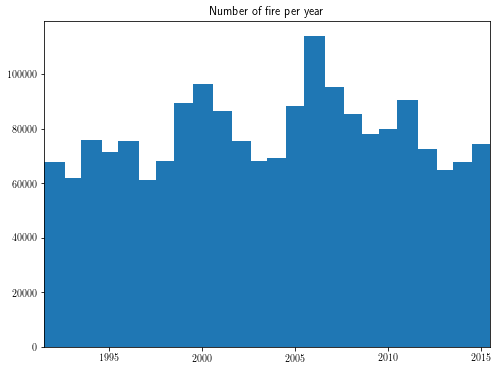

In [64]:
def yearplot(df):
    tmp = df.groupby('year').size()
    hist = tmp.values
    width = 1.1
    center = np.arange(1991.5,2015.5)
    plt.bar(center, hist, align='edge', width=width)
    ax=plt.gca()
    ax.set_xlim((1991.5,2015.5))
    plt.title('Number of fire per year')
    plt.show()
yearplot(df)

The distribution in years is bumpy, but we can see an increasing trend from
1992 to 2006 and then a decreasing trend.

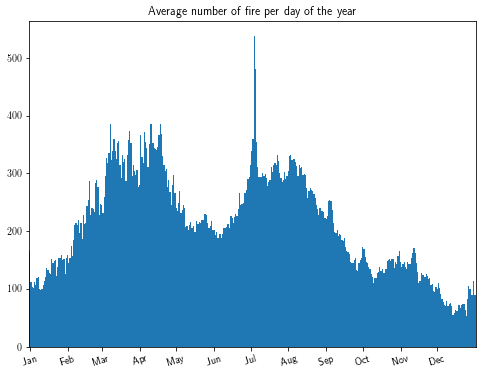

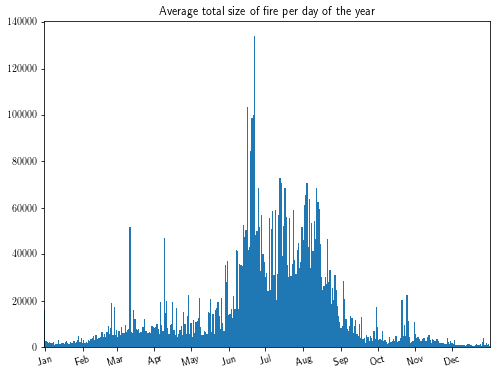

In [67]:
def dayplot(df):
    tmp = df.groupby(['day','year']).size().groupby(level='day').mean()
    hist = tmp.values
    width = 1
    center = np.arange(0.5,366.5)
    plt.bar(center, hist, align='edge', width=width)
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    # Those numbers don't work for leap year, but it doesn't really matter.
    day =[1,32,60,91,121,152,182,213,244,274,305,335]
    plt.xticks(day, month, rotation=17)
    ax=plt.gca()
    ax.set_xlim((0.5,366.5))
    plt.title('Average number of fire per day of the year')
    plt.show()

    tmp = df.groupby(['day','year'])['size'].sum().groupby(level='day').mean()
    hist = tmp.values
    width = 1
    center = np.arange(0.5,366.5)
    plt.bar(center, hist, align='edge', width=width)
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    # Those numbers don't work for leap year, but it doesn't really matter.
    day =[1,32,60,91,121,152,182,213,244,274,305,335]
    plt.xticks(day, month, rotation=17)
    ax=plt.gca()
    ax.set_xlim((0.5,366.5))
    plt.title('Average total size of fire per day of the year')
    plt.show()
    
dayplot(df)

The distribution in day of the year has a bump in March and April and a bump in July and August which peaks in early July. The fire are less frequent from October to February.

The total size of fire (sum over the size of all fires during one day) is maximum from the beggining of June to the beggining of September. There is no peak on the 4th of July, so it is likely than the fire caused by the 4th of July festivity are not big.

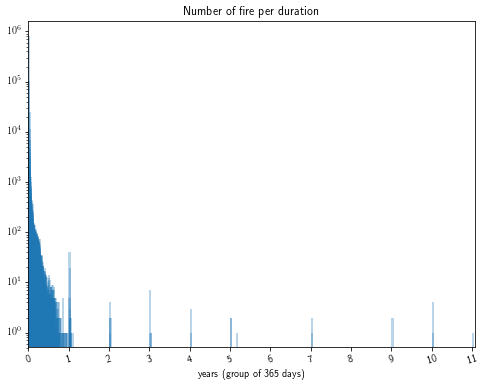

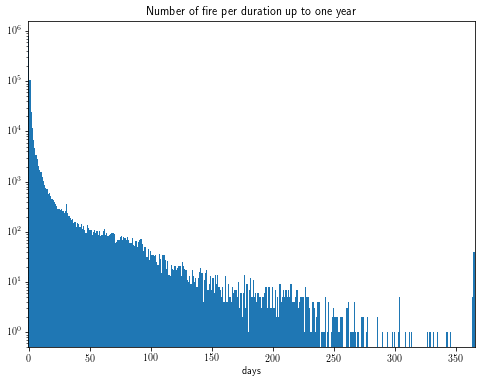

In [68]:
def durationplot(df):
    hist = df.groupby('duration').size()
    center = np.arange(-0.5,4018.5)
    index = np.arange(0.,4019)
    hist0 = pd.Series(dict(zip(index, np.zeros_like(center))))
    hist = hist0.add(hist,fill_value=0)
    plt.bar(center, hist, align='edge', width=20, alpha=0.3)
    ax=plt.gca()
    ax.set_xlim((-0.5,4038.5))
    ax.set_yscale('log')
    plt.xticks(np.arange(0,4018,365), range(12), rotation=17)
    plt.xlabel('years (group of 365 days)')
    plt.title('Number of fire per duration')
    plt.show()

    # zoom on first year
    plt.bar(center, hist, align='edge', width=1)
    ax=plt.gca()
    ax.set_xlim((-0.5,365.5))
    ax.set_yscale('log')
    plt.title('Number of fire per duration up to one year')
    plt.xlabel('days')
    plt.show()
durationplot(df)

Most fires don't last long, both plots are logarithmic. They are very few fires that
lasted more than 250 days, but there is a peak (14 cases) at 365 which I believe is due to an approximation in the contained date since there is no natural reason for a fire to last exactly one year. There is also a strange number of cases close to other integer number of years.

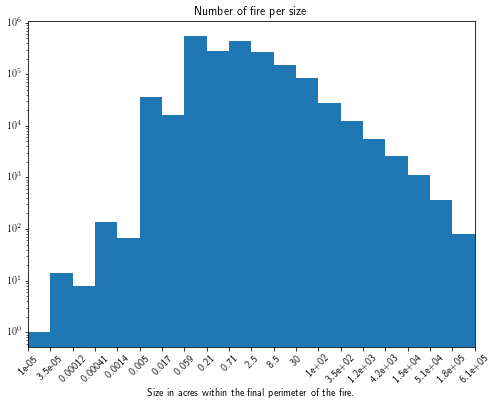

In [69]:
from matplotlib.ticker import FormatStrFormatter

def sizeplot(df):
    binnumber = 20
    maxsize = df['size'].max()
    minsize = df['size'].min()
    bins = (maxsize/minsize)**(np.arange(0,binnumber+1)/binnumber)*minsize

    hist0, _ = np.histogram(df['size'],bins=bins)
    width = bins[1:]-bins[0:-1]

    plt.bar(bins[:-1], hist0, align='edge', width=width)
    ax=plt.gca()
    ax.set_yscale('log')
    ax.set_xlim((minsize,maxsize))
    ax.set_xscale('log')
    plt.title('Number of fire per size')
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2g'))
    #plt.xticks(bins[::2])
    plt.xticks(bins, rotation=45)
    plt.xlabel('Size in acres within the final perimeter of the fire.')
    plt.show()
sizeplot(df)

The vast majority of fire are between $0.06$ and $30$ acres. It is a plot logarithmic in both the x and y axis, so the fact that the distribution grows somewhat linearly from $10^{-5}$ to $0.06$ acres indicates that it follows a power relationship with a positive power. From $8.5$ to $6.1 \times 10^5$, it follows a power relationship with a negative power.

In [4]:
def f(x):
    if x['year'] % 4 == 0:
        return x['day']-186
    else:
        return x['day']-185

df['day4thJuly'] = df.apply(f,axis=1)

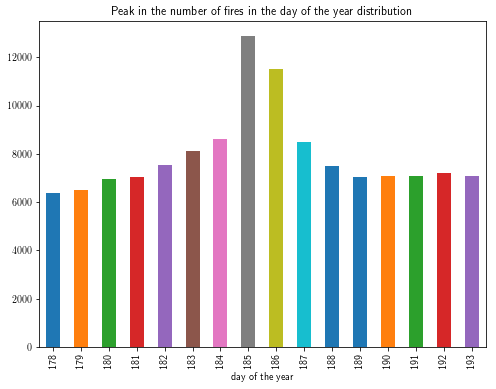

The 4th of July is the day 185 on non-leap years


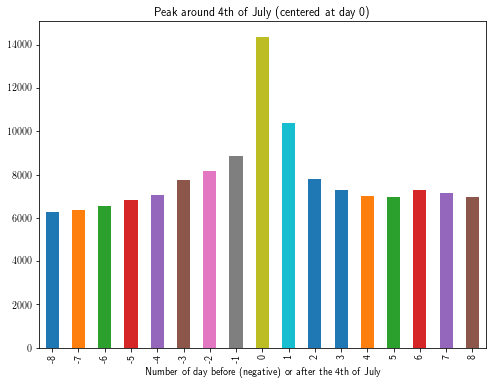

In [77]:
def Peakplot(df):
    tmp = df.groupby('day').size()
    tmp = tmp[tmp.idxmax()-8:tmp.idxmax()+8]
    tmp.plot('bar')
    plt.xlabel('day of the year')
    plt.title('Peak in the number of fires in the day of the year distribution')
    plt.show()
    # For a non-leap year 185 the 4th of July, for a leap year it's 186.

def Julyplot(df):
    tmp = df.groupby('day4thJuly').size()
    tmp = tmp.loc[tmp.idxmax()-8:tmp.idxmax()+8]
    tmp.plot('bar')
    plt.title('Peak around 4th of July (centered at day 0)')
    plt.xlabel('Number of day before (negative) or after the 4th of July')
    plt.show()
Peakplot(df)
print('The 4th of July is the day 185 on non-leap years')
Julyplot(df)

It is clear that there are a lot more fires on the 4th of July. There are also more fires the day after the 4th of July. At a lesser degree there is a upward trend in the 6 days before the 4th of July.

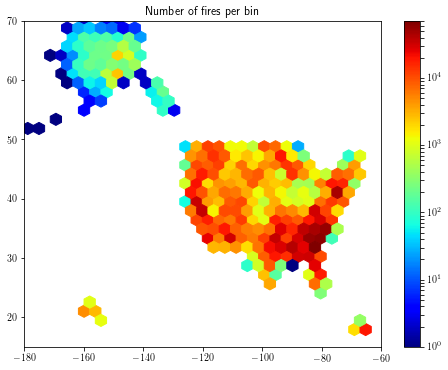

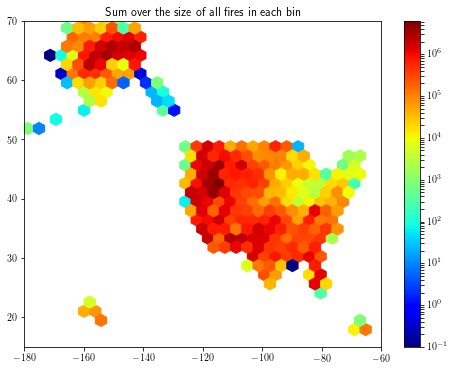

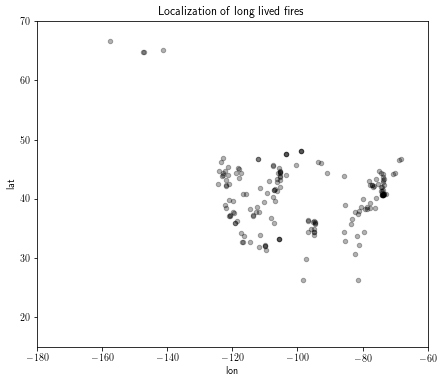

In [86]:
from matplotlib import cm, colors
def mapplot(df):
    gridsize=30
    plt.hexbin(df['lon'].values, df['lat'].values, df['size'].values/df['size'].values, gridsize=gridsize, reduce_C_function=np.sum, cmap=cm.jet,
              norm=colors.LogNorm())
    cb = plt.colorbar()
    plt.title('Number of fires per bin')
    ax = plt.gca()
    ax.set_xlim((-180,-60))
    ax.set_ylim((15,70))
    #cb.set_label('Number of fires per bin')
    plt.show()

    gridsize=30
    plt.hexbin(df['lon'].values, df['lat'].values,df['size'].values, gridsize=gridsize, reduce_C_function=np.sum, cmap=cm.jet,
              norm=colors.LogNorm())
    cb = plt.colorbar()
    #cb.set_label('Sum over the size of all fires in each bin')
    plt.title('Sum over the size of all fires in each bin')
    ax = plt.gca()
    ax.set_xlim((-180,-60))
    ax.set_ylim((15,70))
    plt.show()

    df[df['duration']>250].plot(x='lon',y='lat',kind='scatter', alpha=0.3, color='k', zorder=2)
    plt.title('Localization of long lived fires')
    ax = plt.gca()
    ax.set_xlim((-180,-60))
    ax.set_ylim((15,70))
    fig = plt.gcf()
    fig.set_size_inches(7, 6)
    plt.show()
mapplot(df)

We can see it corresponds to the USA with Alaska (top left), Hawaii (bottom left) and Puerto Rico (bottom right).

Most fires happens in the South East. There are also a lot of fires on the West coast and the Mid-Atlantic region.

When we consider the size of the fire, the most burned region are the center of Alaska and the West. The South East is still considerably burned.

Hexagone on the coast can contain a lot of water, that's why they can have a lot less fire than their neighboors.

The long lived fires are everywhere in the contiguous USA and there are also in Alaska.

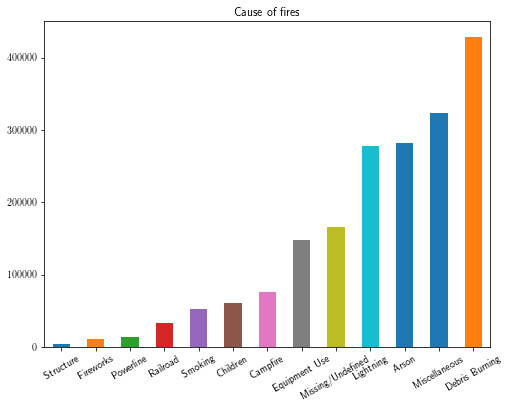

In [61]:
hist = df.groupby('cause').size().sort_values()
hist.plot('bar', rot=30)
plt.title('Cause of fires')
plt.xlabel('')
plt.show()

Lightning, arson, miscellaneous and debris burning are the most common categories. Since miscellaneous means of various sources, it makes sense to put it with the other unfrequent categories rather than analyzing it on its own.

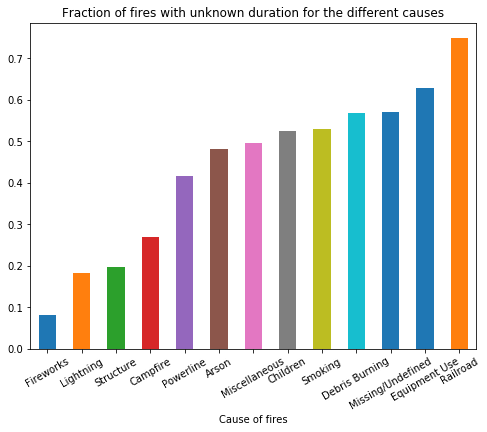

In [3]:
# ratio for unknown_duration
hist = df[df['duration'].isna()].groupby('cause').size()/df.groupby('cause').size()
hist = hist.sort_values()
hist.plot('bar', rot=30)
plt.title('Fraction of fires with unknown duration for the different causes')
plt.xlabel('Cause of fires')
plt.show()

It seems than the duration is known for most fire caused by fireworks, lightning and structure. On the other hand, for many other categories there is over 50% of the fire which have an unknown duration.

Let's analyse the distribution for different causes

In [51]:
df_DB = df[df['cause']=='Debris Burning']
df_Arson = df[df['cause']=='Arson']
df_Lightning = df[df['cause']=='Lightning']
df_Other = df[(df['cause']!='Debris Burning')&(df['cause']!='Arson')&(df['cause']!='Lightning')]

### Debris burning

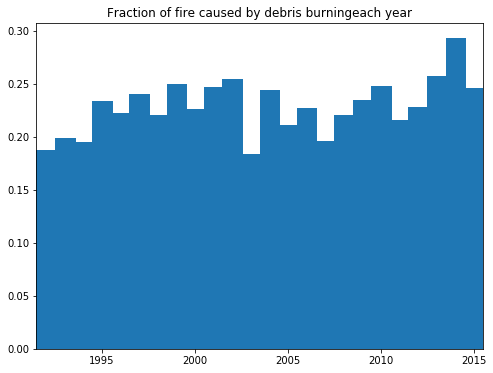

In [52]:
def yearplotRatio(df1,df2,cause):
    tmp = df1.groupby('year').size()/df2.groupby('year').size()
    hist = tmp.values
    width = 1.1
    center = np.arange(1991.5,2015.5)
    plt.bar(center, hist, align='edge', width=width)
    ax=plt.gca()
    ax.set_xlim((1991.5,2015.5))
    plt.title('Fraction of fire caused by '+cause+' each year')
    plt.show()
yearplotRatio(df_DB,df,'debris burning')

I don't expect much change from year to year in the causes of wildfires, so it is normal that it is mostly a noisy constant. It is possible to have some change due to change in the climate (wildfires distribution change a lot with the day of the year, which indicates it is weather dependant, and thus should change with the climate), but we don't really have data over a period long enough to observe it.

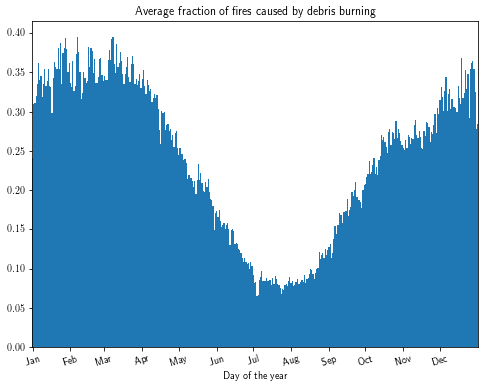

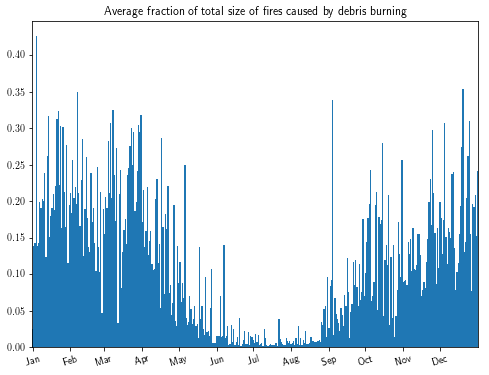

In [99]:
def dayplotRatio(df1, df2,cause):
    tmp = df1.groupby(['day','year']).size().groupby(level='day').mean()/df2.groupby(['day','year']).size().groupby(level='day').mean()
    hist = tmp.values
    width = 1
    center = np.arange(0.5,366.5)
    plt.bar(center, hist, align='edge', width=width)
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    # Those numbers don't work for leap year, but it doesn't really matter.
    day =[1,32,60,91,121,152,182,213,244,274,305,335]
    plt.xticks(day, month, rotation=17)
    ax=plt.gca()
    ax.set_xlim((0.5,366.5))
    plt.xlabel('Day of the year')
    plt.title('Average fraction of fires caused by '+cause)
    plt.show()

    tmp = df1.groupby(['day','year'])['size'].sum().groupby(level='day').mean()/df2.groupby(['day','year'])['size'].sum().groupby(level='day').mean()
    hist = tmp.values
    width = 1
    center = np.arange(0.5,366.5)
    plt.bar(center, hist, align='edge', width=width)
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    # Those numbers don't work for leap year, but it doesn't really matter.
    day =[1,32,60,91,121,152,182,213,244,274,305,335]
    plt.xticks(day, month, rotation=17)
    ax=plt.gca()
    ax.set_xlim((0.5,366.5))
    plt.title('Average fraction of total size of fires caused by '+cause)
    plt.show()

dayplotRatio(df_DB,df,'debris burning')

Debris burning are responsible during a large part of the year of one third of the fire and 15% of their size, but in summer, it goes down to 10% of the fire and those fires are a negligible fraction of the size. 

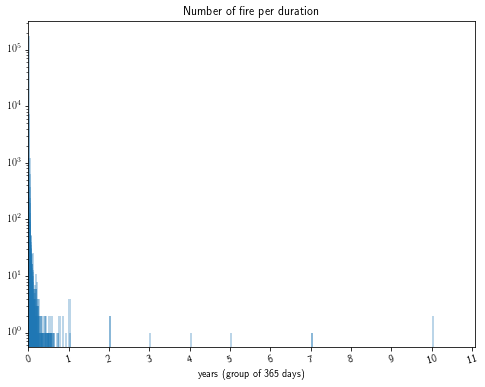

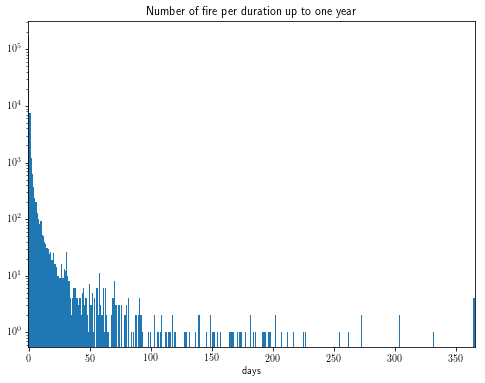

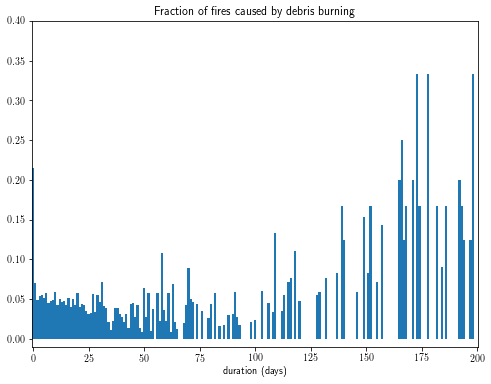

In [106]:
def durationplotRatio(df1, df2,cause, ylim=0.4):
    hist = df1.groupby('duration').size()/df2.groupby('duration').size()
    center = np.arange(-0.5,4018.5)
    index = np.arange(0.,4019)
    hist0 = pd.Series(dict(zip(index, np.zeros_like(center))))
    hist = hist0.add(hist,fill_value=0)
    plt.bar(center, hist, align='edge', width=1)
    ax=plt.gca()
    ax.set_xlim((-0.5,200.5))
    ax.set_ylim((-0.01,ylim))
    plt.title('Fraction of fires caused by '+cause)
    plt.xlabel('duration (days)')
    plt.show()

durationplot(df_DB)
durationplotRatio(df_DB,df,'debris burning')

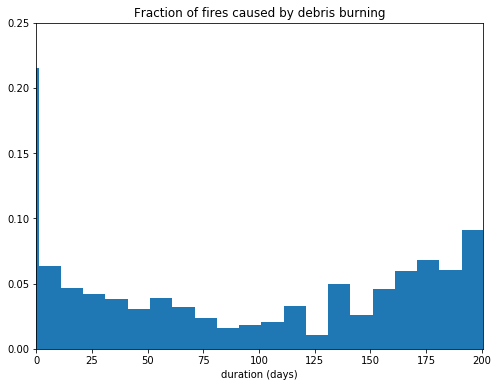

In [199]:
# binned duration ratio
def durationplotRatio2(df1, df2,cause, ylim=0.4, binsize=10):
    hist1 = df1.groupby('duration').size()
    index = np.arange(0.,4019)
    hist0 = pd.Series(dict(zip(index, np.zeros_like(index))))
    hist1 = hist0.add(hist1,fill_value=0)
    s = (((index+binsize-1) // binsize)*binsize+1-binsize).astype(int) # 0 is it's own bin, afterwards it uses binsize
    hist1 = hist1.groupby(s).sum()
    
    hist2 = df2.groupby('duration').size()
    hist2 = hist0.add(hist2,fill_value=0)
    hist2 = hist2.groupby(s).sum()
    
    hist = hist1/hist2
    plt.bar(hist.index.to_series(), hist, align='edge', width=binsize)
    ax=plt.gca()
    ax.set_xlim((0.,200.5))
    ax.set_ylim((0.,ylim))
    plt.title('Fraction of fires caused by '+cause)
    plt.xlabel('duration (days)')
    plt.show()
    
durationplotRatio2(df_DB,df,'debris burning', 0.25, 10)

The fire caused by debris burning are a large fraction of the fires with a duration of 0. They are less than 10% of the fires with a non-zero duration.

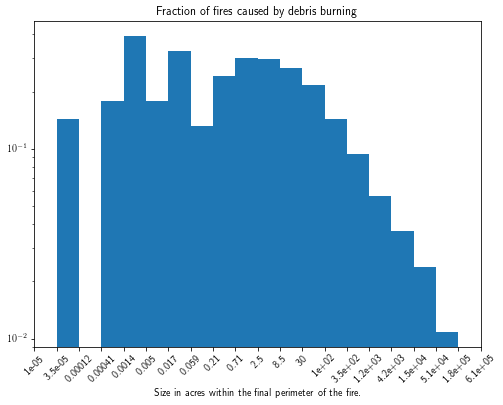

In [107]:
def sizeplotRatio(df2, df,cause):
    binnumber = 20
    maxsize = df['size'].max()
    minsize = df['size'].min()
    bins = (maxsize/minsize)**(np.arange(0,binnumber+1)/binnumber)*minsize

    hist0, _ = np.histogram(df['size'],bins=bins)
    width = bins[1:]-bins[0:-1]
    hist2, _ = np.histogram(df2['size'],bins=bins)
    hist = hist2/hist0

    plt.bar(bins[:-1], hist, align='edge', width=width)
    ax=plt.gca()
    ax.set_yscale('log')
    ax.set_xlim((minsize,maxsize))
    ax.set_xscale('log')
    plt.title('Fraction of fires caused by '+cause)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2g'))
    #plt.xticks(bins[::2])
    plt.xticks(bins, rotation=45)
    plt.xlabel('Size in acres within the final perimeter of the fire.')
    plt.show()

sizeplotRatio(df_DB,df,'debris burning')

The fraction of fire caused by debris burning decreases fast for size bigger than 30 acres.

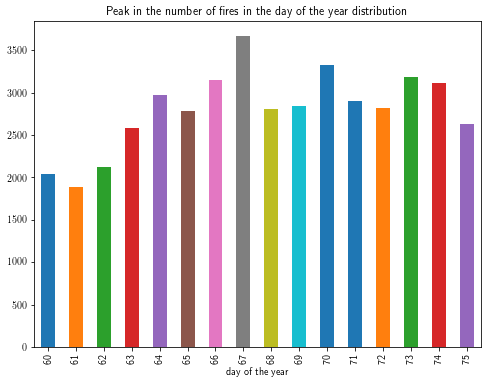

In [78]:
Peakplot(df_DB)

There is no peak for the fire caused by debris burning like there is one around the 4th of July for the total amount of fire.

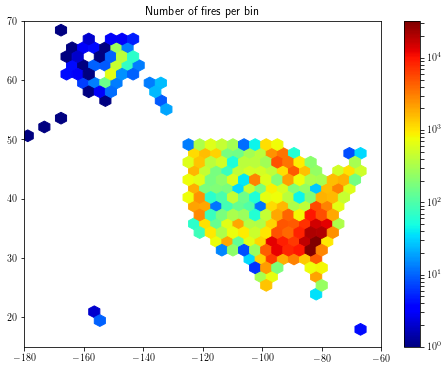

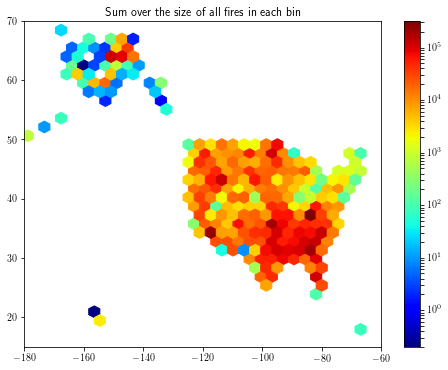

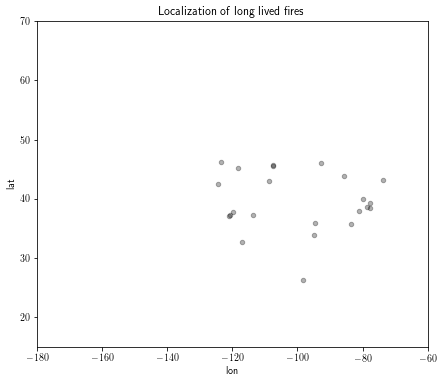

In [89]:
mapplot(df_DB)

Debris burning caused fires mostly in the South-East.

### Arson

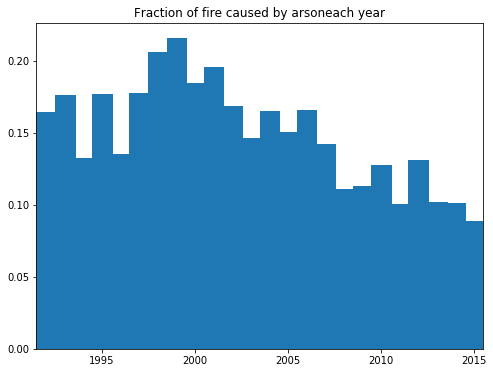

In [53]:
yearplotRatio(df_Arson,df,'arson')

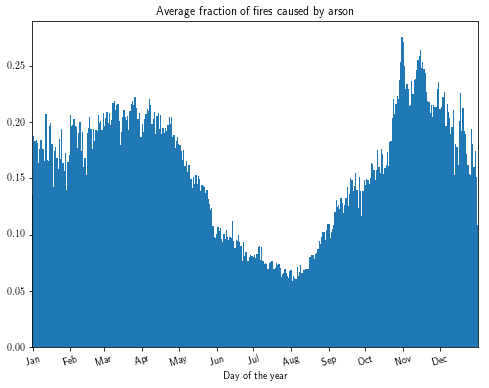

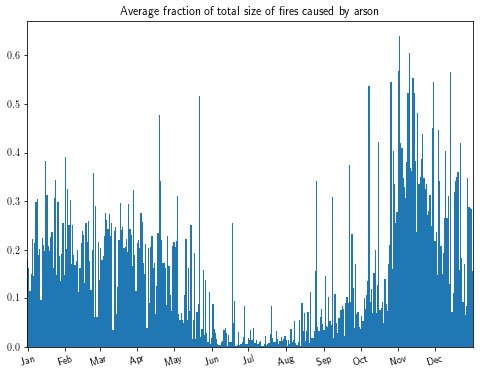

In [108]:
dayplotRatio(df_Arson,df,'arson')

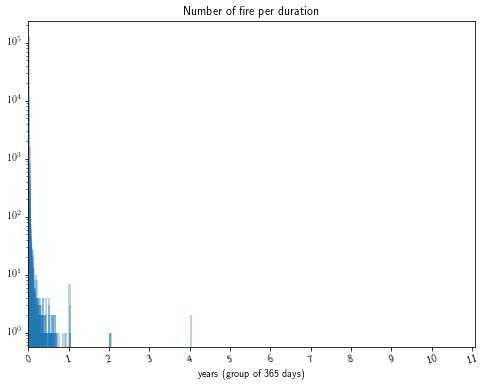

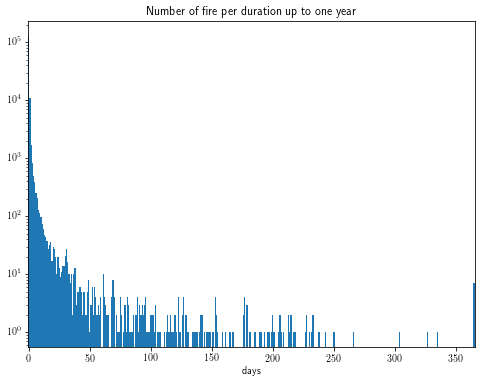

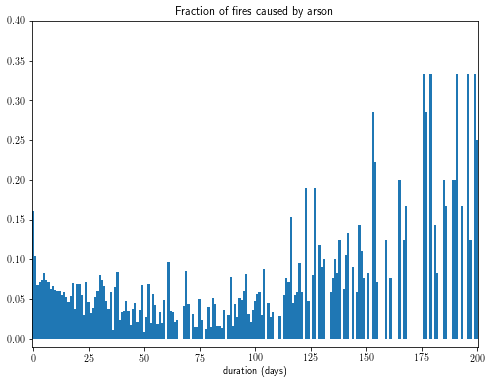

In [109]:
durationplot(df_Arson)
durationplotRatio(df_Arson,df,'arson')

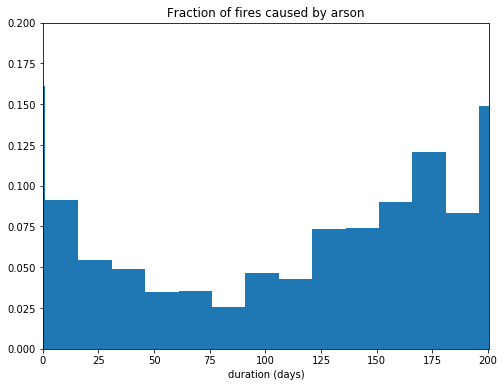

In [208]:
durationplotRatio2(df_Arson,df,'arson', 0.2, 15)

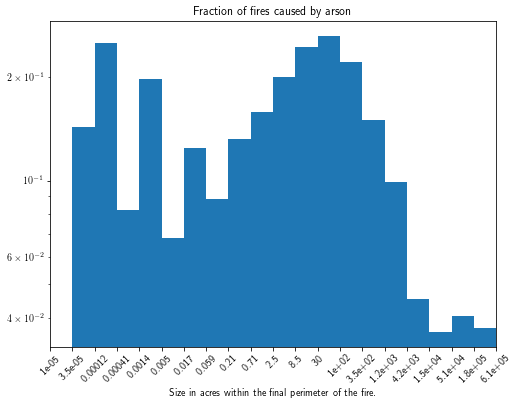

In [110]:
sizeplotRatio(df_Arson,df,'arson')

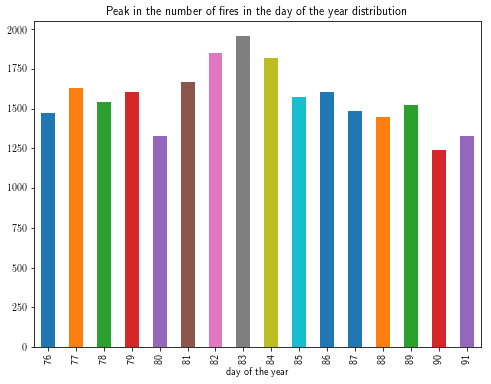

In [111]:
Peakplot(df_Arson)

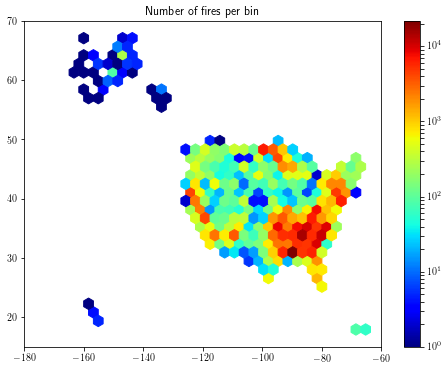

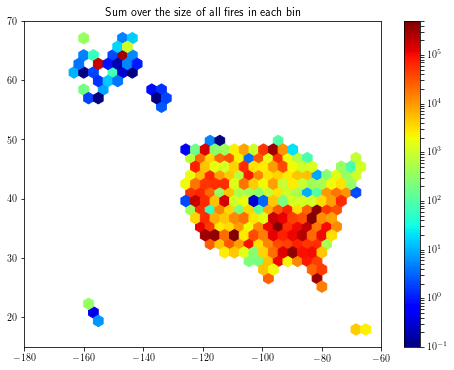

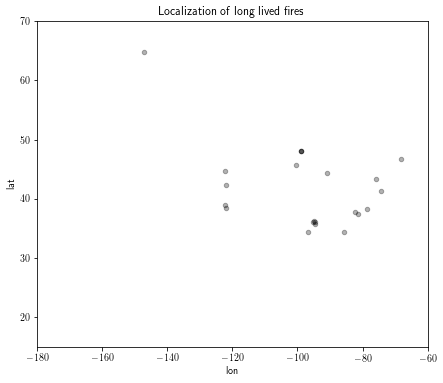

In [95]:
mapplot(df_Arson)

Fires caused by arson are similar to the ones cause by debris burning. Their distribution in size is slightly different since it goes down faster and then stays at round 2% for the very large fires.

Their distribution in year went down which might be due to a reduction in crimes in the US.

### Lightning

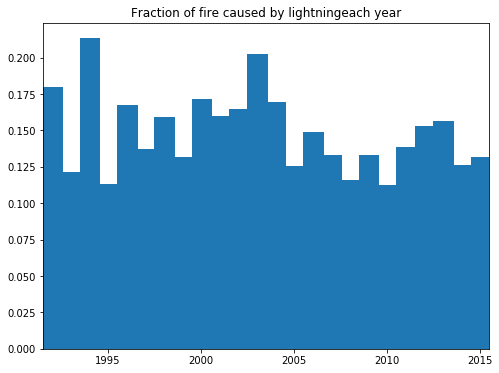

In [54]:
yearplotRatio(df_Lightning,df,'lightning')

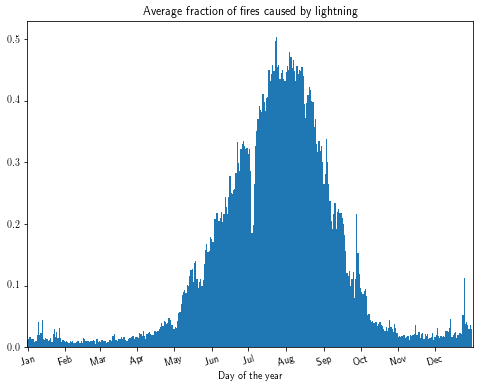

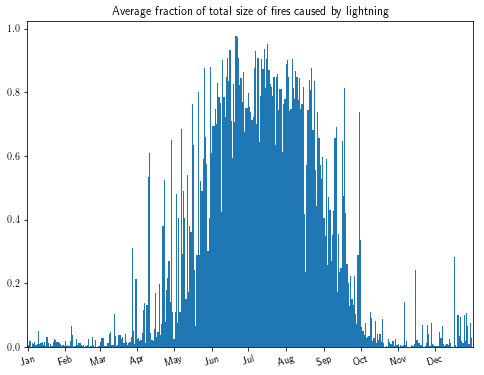

In [112]:
dayplotRatio(df_Lightning,df,'lightning')

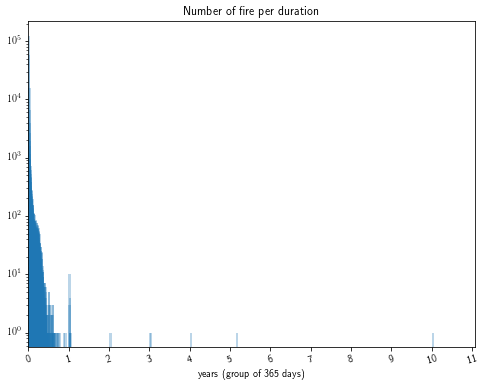

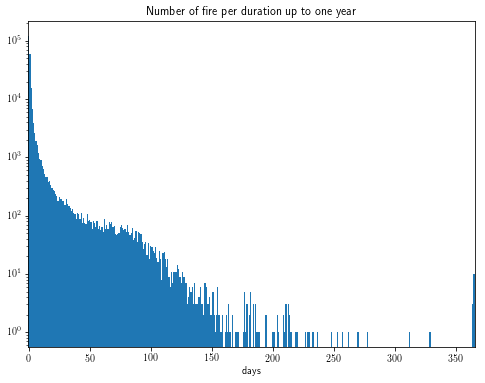

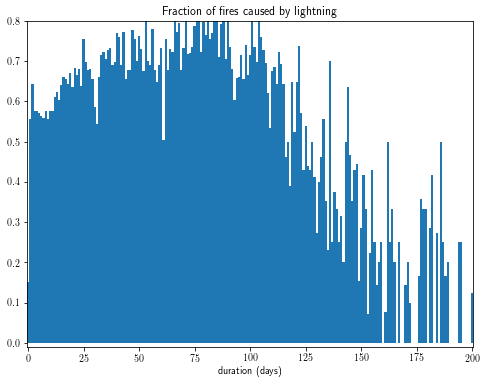

In [118]:
durationplot(df_Lightning)
durationplotRatio(df_Lightning,df,'lightning', ylim=0.8)

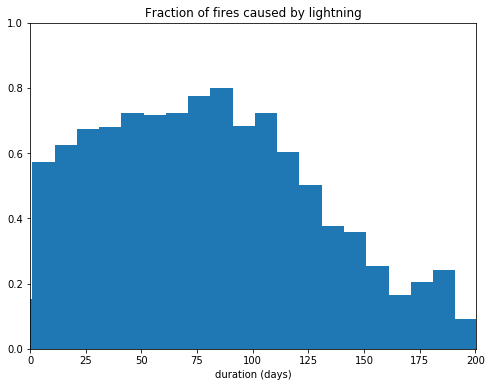

In [211]:
durationplotRatio2(df_Lightning,df,'lightning', 1., 10)

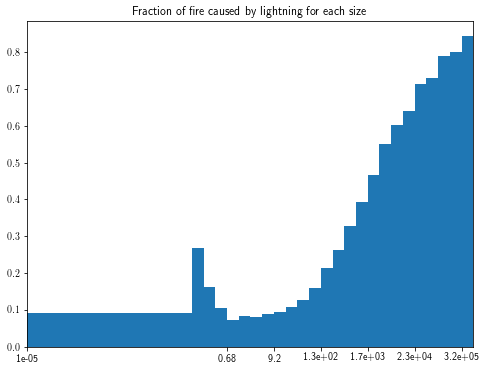

In [121]:
# Bellow 1e-1 the number of fire by bins is small. Let's put them together.

from matplotlib.ticker import FormatStrFormatter
binnumber = 25
maxsize = df['size'].max()
minsize = df['size'].min()
logsize = 5e-2
bins = (maxsize/logsize)**(np.arange(0,binnumber+1)/binnumber)*logsize
bins[0]=minsize

hist0, _ = np.histogram(df['size'],bins=bins)
histL, _ = np.histogram(df_Lightning['size'],bins=bins)
width = bins[1:]-bins[0:-1]

hist = histL/hist0
plt.bar(bins[:-1], hist, align='edge', width=width)
ax=plt.gca()
ax.set_xlim((minsize,maxsize))
ax.set_xscale('log')
plt.title('Fraction of fire caused by lightning for each size')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2g'))
plt.xticks(bins[::4])
plt.show()

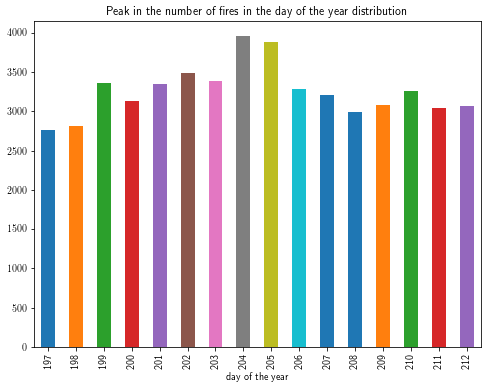

In [115]:
Peakplot(df_Lightning)

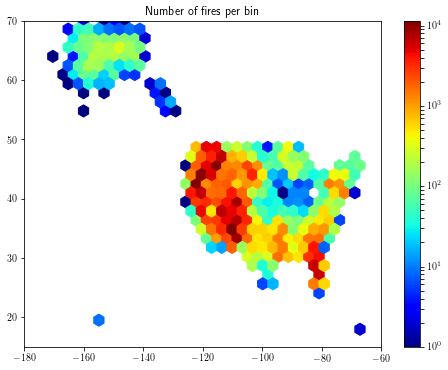

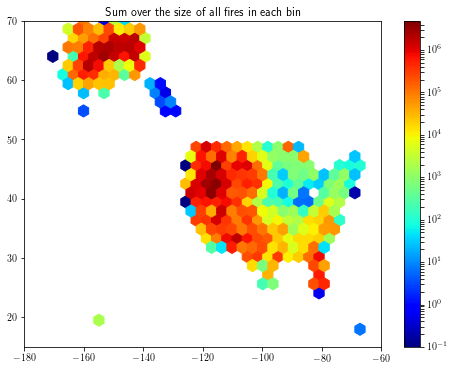

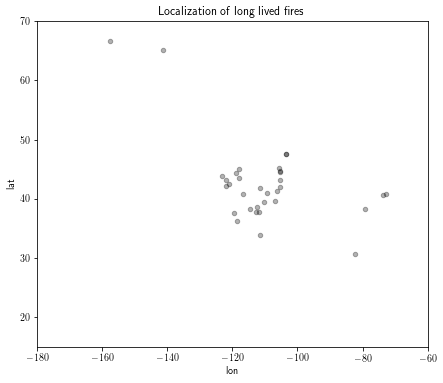

In [116]:
mapplot(df_Lightning)

The fire caused by lightning have a very different distribution. They are responsible for most of the size and a very large fraction of the fire from the beggining of May to the beggining of October. There is an important drop in the ratio around the 4th of July because of the peak in fire with other causes.

Most fires with a short, but non-zero, duration are caused by lightning.

Fires caused by lightning are around 10% of the small fires, but it increases fast with the size, they are more than 80% of the fires greater than $3.2 \times 10^5$ acres.

They also don't have a peak in day of the year.

They happen mostly in the West and in Florida. Lightning causes large fires in Alaska.

### Other

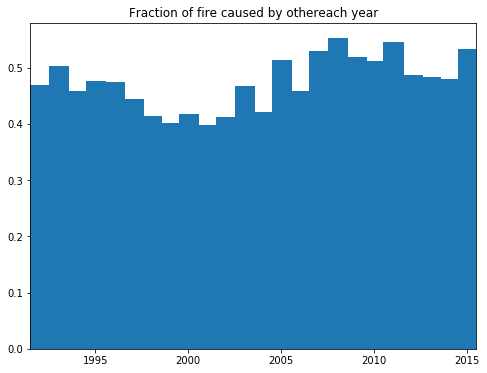

In [55]:
yearplotRatio(df_Other,df,'other')

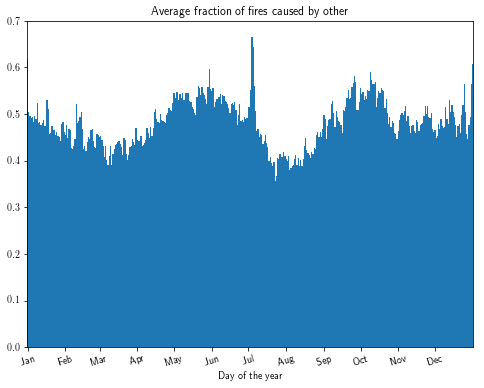

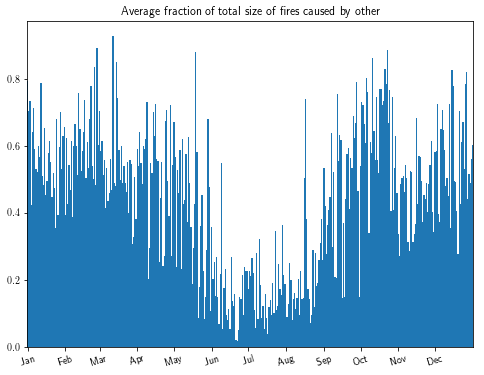

In [127]:
dayplotRatio(df_Other,df,'other')

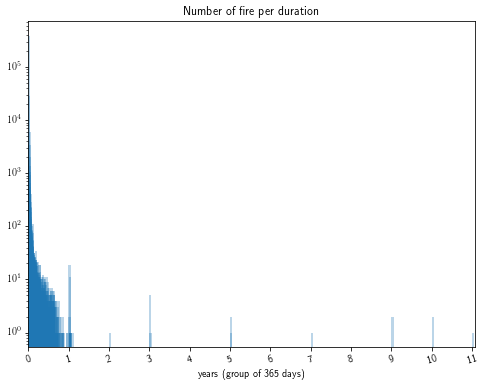

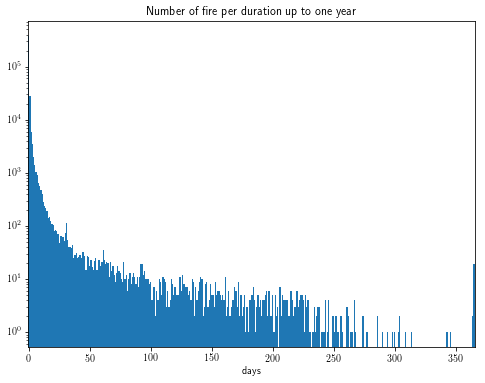

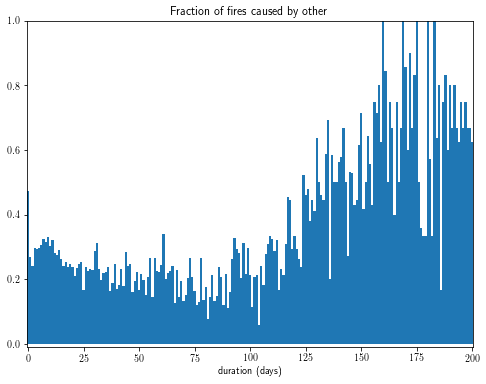

In [132]:
durationplot(df_Other)
durationplotRatio(df_Other,df,'other', ylim=1.)

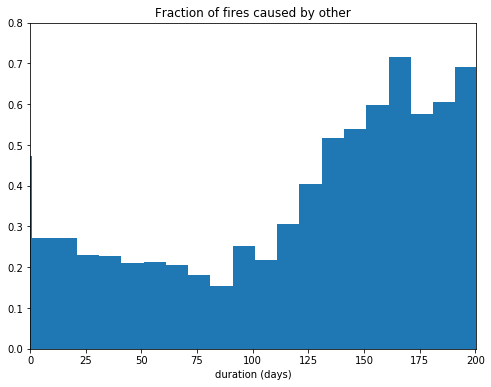

In [213]:
durationplotRatio2(df_Other,df0,'other', 0.8, 10)

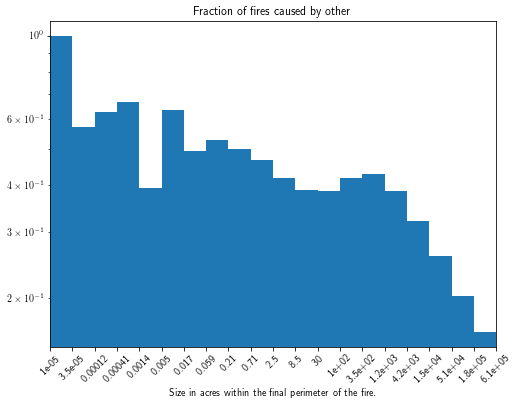

In [129]:
sizeplotRatio(df_Other,df,'other')

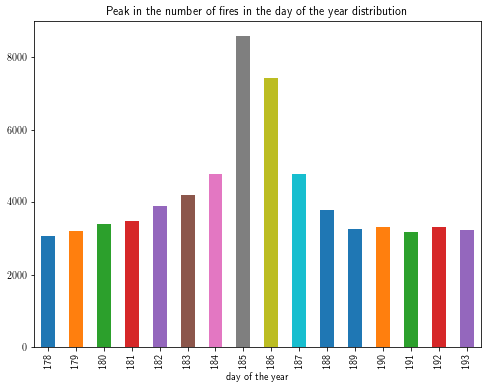

In [130]:
Peakplot(df_Other)

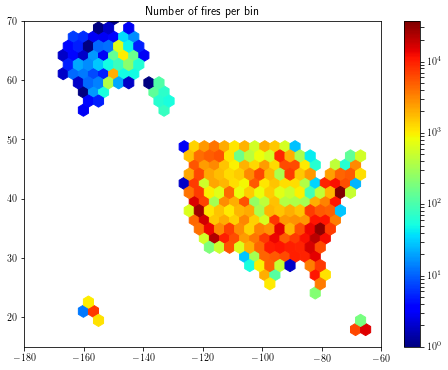

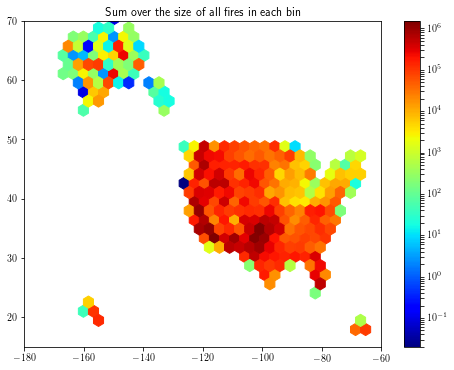

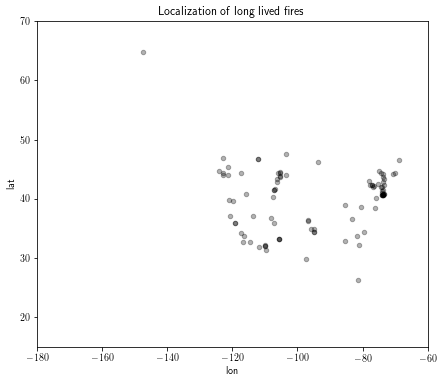

In [131]:
mapplot(df_Other)

The fires caused by another cause than debris burning, arson or lightning tend to be consistently around 50% of the fires around the year though they have a marked peak around the 4th of July. Their size is considerably smaller than the size of the fires caused by lightning, so they are a small fraction of the size in summer. They tend to have a long duration, but they are also a large fraction of the 0 duration fires. They happen mostly in the South East, but when weighted by their size, they happen everywhere in the 48 contiguous US states but the North-East.

Their properties are very different than the ones caused by lightning and somewhat different than the ones caused by debris burning or arson.

# Predict whether a fire is caused by lightning

Since fires caused by lightning have a very different distribution than the other, it seems it should be possible to predict whether a fire is caused by lightning or something else.

In [10]:
print(len(df))
print(len(df[df['cause']=='Lightning']))

1880465
278468


Since the number of examples is so large, 1% of the set is a number big enough to get a good value for the test set. For the validation set, since I will use XGBoost which has a lot of hyperparameters, 5% is better.

In [34]:
from sklearn.model_selection import train_test_split
train_df = df.drop('cause',axis=1)

X, X_test, y, y_test = train_test_split(
    train_df, df['cause']=='Lightning', test_size=0.01, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.05, shuffle=True)

In [35]:
display(X_train.describe())
display(X_train.head())
display(y_train.describe())
display(y_train.head())

print(len(X_train))
print(len(X_val))
print(len(X_test))
print(sum(y_train)) # true is 1, so it's the number of lightning
print(sum(y_val))
print(sum(y_test))

,year,day,duration,size,lat,lon,day4thJuly
count,1.768577e+06,1.768577e+06,930022.000000,1.768577e+06,1.768577e+06,1.768577e+06,1.768577e+06
mean,2.003709e+03,1.647133e+02,1.220180,7.479355e+01,3.677998e+01,-9.570395e+01,-2.053525e+01
std,6.663332e+00,9.003552e+01,14.315652,2.508607e+03,6.138333e+00,1.671648e+01,9.005286e+01
min,1.992000e+03,1.000000e+00,0.000000,1.000000e-05,1.793972e+01,-1.733857e+02,-1.850000e+02
25%,1.998000e+03,8.900000e+01,0.000000,1.000000e-01,3.281840e+01,-1.103557e+02,-9.600000e+01
50%,2.004000e+03,1.640000e+02,0.000000,1.000000e+00,3.545110e+01,-9.204097e+01,-2.100000e+01
75%,2.009000e+03,2.300000e+02,0.000000,3.300000e+00,4.082539e+01,-8.229690e+01,4.500000e+01
max,2.015000e+03,3.660000e+02,4018.000000,6.069450e+05,7.033060e+01,-6.525694e+01,1.800000e+02


,year,day,duration,size,lat,lon,day4thJuly
606270,1994,106,NaN,5.0,32.335410,-95.118750,-79
1221147,2010,72,NaN,60.0,30.610456,-89.318308,-113
534211,2009,100,NaN,14.0,35.023330,-77.961670,-85
950734,2001,134,NaN,10.0,38.550000,-78.550000,-51
1163547,2004,12,0.0,5.0,34.998438,-87.893274,-174


count     1768577
unique          2
top         False
freq      1506644
Name: cause, dtype: object

606270     False
1221147    False
534211     False
950734     False
1163547    False
Name: cause, dtype: bool

1768577
93083
18805
261933
13661
2874


### XGboost

In [38]:
from xgboost import XGBClassifier

clf = XGBClassifier(nthread = -1)
clf.fit(X = X_train.values, y = y_train.values, eval_metric='error', early_stopping_rounds=10, 
                eval_set = [(X_val.values, y_val.values)])
print(clf.evals_result())

[0]	validation_0-error:0.113619
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.113619
[2]	validation_0-error:0.113673
[3]	validation_0-error:0.113673
[4]	validation_0-error:0.113673
[5]	validation_0-error:0.11363
[6]	validation_0-error:0.112072
[7]	validation_0-error:0.113641
[8]	validation_0-error:0.113641
[9]	validation_0-error:0.112061
[10]	validation_0-error:0.112018
[11]	validation_0-error:0.112018
[12]	validation_0-error:0.111965
[13]	validation_0-error:0.11204
[14]	validation_0-error:0.11204
[15]	validation_0-error:0.112094
[16]	validation_0-error:0.112061
[17]	validation_0-error:0.111932
[18]	validation_0-error:0.111943
[19]	validation_0-error:0.112018
[20]	validation_0-error:0.112008
[21]	validation_0-error:0.112008
[22]	validation_0-error:0.112008
[23]	validation_0-error:0.112008
[24]	validation_0-error:0.112008
[25]	validation_0-error:0.112008
[26]	validation_0-error:0.111997
[27]	validation_0-error:0.111954
Stopping. Best iteratio

In [39]:
print(min(clf.evals_result()['validation_0']['error']))

0.111932


In [41]:
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from time import time
from random import randint

def objective(space):
    param={'learning_rate' : space['learning_rate'],
     'max_depth' : int(space['max_depth']),
     'min_child_weight' : space['min_child_weight'],
        'gamma' : space['gamma'],
     'subsample' : space['subsample'],
     'colsample_bytree' :space['colsample_bytree'],
     'nthread' : -1
          }
    clf = XGBClassifier(**param)
    clf.fit(X = X_train.values, y = y_train.values, eval_metric='error', early_stopping_rounds=10, 
                    eval_set = [(X_val.values, y_val.values)], verbose=False)
    error = min(clf.evals_result()['validation_0']['error'])
    print(time() - start_time, error)
    return{'loss':error, 'status': STATUS_OK }


space ={
        'max_depth': hp.quniform ('max_depth', 1, 14, 1),
        'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
        'subsample': hp.uniform ('subsample', 0.1, 1.),
        'learning_rate' : hp.uniform ('learning_rate', 0.01, 0.5),
       'colsample_bytree': hp.uniform ('colsample_bytree', 0.5, 1.),
        'gamma': hp.uniform ('gamma', 0., 1.)
    }

trials = Trials()
start_time = time()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=2,
            trials=trials)

best['max_depth'] = int(best['max_depth'])
print(best)

75.49331593513489 0.064824
200.40397930145264 0.05523
{'colsample_bytree': 0.6109974234101829, 'gamma': 0.5813428137707901, 'learning_rate': 0.2273733653102295, 'max_depth': 12, 'min_child_weight': 2.0, 'subsample': 0.4611380635185053}


In [44]:
space ={
        'max_depth': hp.quniform ('max_depth', 3, 18, 1),
        'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
        'subsample': hp.uniform ('subsample', 0.1, 1.),
        'learning_rate' : hp.loguniform ('learning_rate', 0.01, 0.5),
       'colsample_bytree': hp.uniform ('colsample_bytree', 0.5, 1.),
        'gamma': hp.uniform ('gamma', 0., 1.)
    }

start_time = time()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

best['max_depth'] = int(best['max_depth'])
print(best)

131.67327427864075 0.056165
192.887371301651 0.066972
213.60277891159058 0.079413
243.2003014087677 0.067359
271.84295773506165 0.078414
319.20204162597656 0.066274
373.762864112854 0.064147
389.5419569015503 0.079477
474.04253816604614 0.071721
510.1674361228943 0.063374
557.1424033641815 0.058904
592.2953903675079 0.075578
671.3166129589081 0.066607
728.2090265750885 0.062611
783.2000215053558 0.068101
828.4624910354614 0.068756
{'colsample_bytree': 0.6659775915633402, 'gamma': 0.47034856632557365, 'learning_rate': 0.2330849942263256, 'max_depth': 14, 'min_child_weight': 5.0, 'subsample': 0.376582186441181}


In [46]:
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=30,
            trials=trials)

best['max_depth'] = int(best['max_depth'])
print(best)

1394.1690571308136 0.081605
1438.8107957839966 0.061977
1470.413471698761 0.078672
1500.5912375450134 0.066725
1527.7198061943054 0.071528
2329.349814414978 0.063782
2350.8455460071564 0.077812
2376.2549891471863 0.074793
2417.3622164726257 0.06665
2434.749204158783 0.084677
{'colsample_bytree': 0.6659775915633402, 'gamma': 0.47034856632557365, 'learning_rate': 0.2330849942263256, 'max_depth': 14, 'min_child_weight': 5.0, 'subsample': 0.376582186441181}


https://vooban.com/en/tips-articles-geek-stuff/hyperopt-tutorial-for-optimizing-neural-networks-hyperparameters/

It is best to use loguniform or lognormal for learning rate

If we don't redo trials = Trials(), we are continuing the same optimization.

[0]	validation_0-error:0.08487
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.081787
[2]	validation_0-error:0.080229
[3]	validation_0-error:0.080928
[4]	validation_0-error:0.082937
[5]	validation_0-error:0.080885
[6]	validation_0-error:0.082743
[7]	validation_0-error:0.075298
[8]	validation_0-error:0.074643
[9]	validation_0-error:0.072978
[10]	validation_0-error:0.074181
[11]	validation_0-error:0.073558
[12]	validation_0-error:0.070195
[13]	validation_0-error:0.070142
[14]	validation_0-error:0.068283
[15]	validation_0-error:0.067284
[16]	validation_0-error:0.065844
[17]	validation_0-error:0.066242
[18]	validation_0-error:0.065759
[19]	validation_0-error:0.065039
[20]	validation_0-error:0.063513
[21]	validation_0-error:0.063137
[22]	validation_0-error:0.062944
[23]	validation_0-error:0.062869
[24]	validation_0-error:0.062009
[25]	validation_0-error:0.061934
[26]	validation_0-error:0.061794
[27]	validation_0-error:0.061117
[28]	validation_0-err

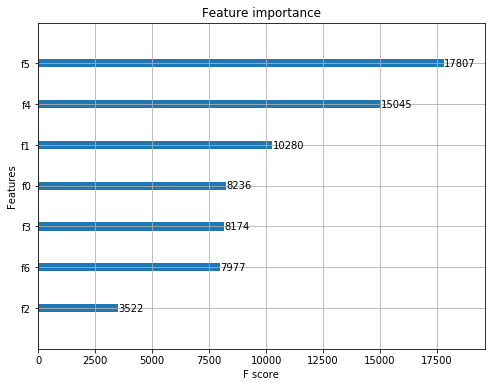

In [47]:
param={'colsample_bytree': 0.6109974234101829, 'gamma': 0.5813428137707901, 
       'learning_rate': 0.2273733653102295, 'max_depth': 12, 'min_child_weight': 2.0, 
       'subsample': 0.4611380635185053,
 'nthread' : -1}
clf = XGBClassifier(**param)
clf.fit(X = X_train.values, y = y_train.values, eval_metric='error', early_stopping_rounds=10, 
                eval_set = [(X_val.values, y_val.values)], verbose=True)
print(min(clf.evals_result()['validation_0']['error']))

from xgboost import plot_importance
plot_importance(clf)

It got to 99, it means it stopped because of the default limit n_estimators = 100.

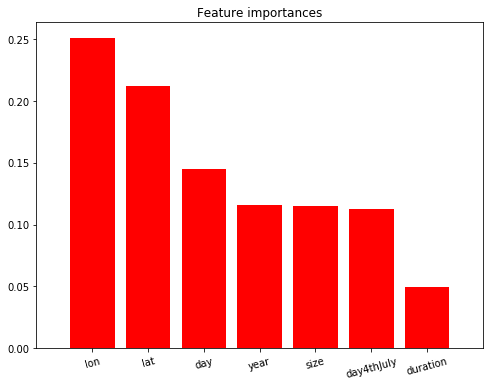

In [49]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.rcParams['text.usetex']=False
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices], rotation=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

It is surprising that 'year' is a more important feature than 'size' since the lightning distribution does not change much which year, but change a lot with size. It is possible that when one consider the interaction with other feature, 'year' is more important. It could also be that 'size' cannot be used at its full potential right now. I will try to use logarithmic transformation to improve it.

Lightning is the main cause of fire for non-zero low duration. I would expect it to be more useful. The low usage of this feature might be due to the large number of NaN and 0, and the fact that when it is 0, lightning is not a main cause, but one might hope to improve that.

'day' and 'day4thofJuly' have mostly the same information, but on leap year. It is possible that XGBoost cannot split them efficiently because their distribution is not monotonic.

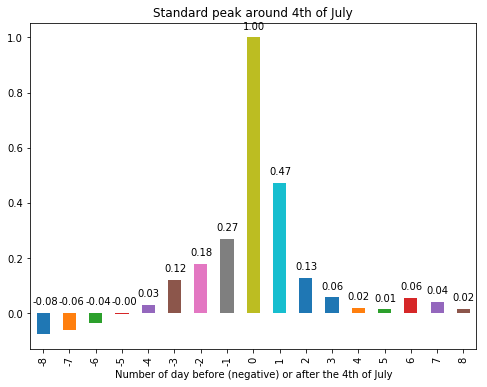

In [79]:
def Julyplot2(df):
    tmp = df.groupby('day4thJuly').size()
    tmp0 = tmp.loc[-8:8]
    mean = (tmp.loc[-8:-4].mean()+tmp.loc[4:8].mean())/2
    tmp0 = tmp0-mean
    tmp0 = tmp0/tmp0.loc[0]
    tmp0.plot('bar')
    plt.title('Standard peak around 4th of July')
    plt.xlabel('Number of day before (negative) or after the 4th of July')
    ax = plt.gca()
    for i, v in enumerate(tmp0.values):
        ax.text(i-0.4, max(v+0.03,0.03), "{:.2f}".format(v))
    plt.show()
Julyplot2(df)

In [85]:
def f(x):
    if x == 0:
        return 1
    elif x == 1:
        return 0.47
    elif x == 2:
        return 0.13
    elif x == -1:
        return 0.27
    elif x == -2:
        return 0.18
    elif x == -3:
        return 0.12
    else:
        return 0
def f2(x):
    if x['year'] % 4 == 0:
        if x['day'] < 306:
            return x['day']
        else:
            return x['day']-366
    else:
        if x['day'] < 305:
            return x['day']
        else:
            return x['day']-365
def moddf(df):
    df['logsize'] = df['size'].apply(np.log)
    df['non0duration'] = df['duration'].replace({0.:np.NaN})
    df['4thJuly']=df['day4thJuly'].apply(f)
    # Change days in November and December as negative day since they are after the time where lightning are important.
    df['dayNov'] = df.apply(f2,axis=1)
    df.drop('day',axis=1,inplace=True)
    return df

X_train2 = moddf(X_train.copy())
X_val2 = moddf(X_val.copy())

In [93]:
X_train2.head()

,year,duration,size,lat,lon,day4thJuly,logsize,non0duration,4thJuly,dayNov
606270,1994,NaN,5.0,32.335410,-95.118750,-79,1.609438,NaN,0.0,106.0
1221147,2010,NaN,60.0,30.610456,-89.318308,-113,4.094345,NaN,0.0,72.0
534211,2009,NaN,14.0,35.023330,-77.961670,-85,2.639057,NaN,0.0,100.0
950734,2001,NaN,10.0,38.550000,-78.550000,-51,2.302585,NaN,0.0,134.0
1163547,2004,0.0,5.0,34.998438,-87.893274,-174,1.609438,NaN,0.0,12.0


[0]	validation_0-error:0.107474
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.080767
[2]	validation_0-error:0.077501
[3]	validation_0-error:0.078682
[4]	validation_0-error:0.07633
[5]	validation_0-error:0.074654
[6]	validation_0-error:0.074192
[7]	validation_0-error:0.073644
[8]	validation_0-error:0.072451
[9]	validation_0-error:0.071399
[10]	validation_0-error:0.071528
[11]	validation_0-error:0.071624
[12]	validation_0-error:0.069819
[13]	validation_0-error:0.068423
[14]	validation_0-error:0.068251
[15]	validation_0-error:0.067821
[16]	validation_0-error:0.066639
[17]	validation_0-error:0.065877
[18]	validation_0-error:0.065694
[19]	validation_0-error:0.065329
[20]	validation_0-error:0.064641
[21]	validation_0-error:0.064426
[22]	validation_0-error:0.06434
[23]	validation_0-error:0.064437
[24]	validation_0-error:0.064351
[25]	validation_0-error:0.063846
[26]	validation_0-error:0.063857
[27]	validation_0-error:0.063438
[28]	validation_0-erro

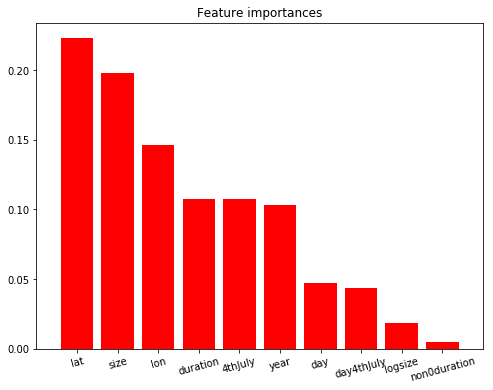

In [92]:
param={'colsample_bytree': 0.6109974234101829, 'gamma': 0.5813428137707901, 
       'learning_rate': 0.2273733653102295, 'max_depth': 12, 'min_child_weight': 2.0, 
       'subsample': 0.4611380635185053,
 'nthread' : -1}
clf2 = XGBClassifier(**param, n_estimators=1000)
clf2.fit(X = X_train2.values, y = y_train.values, eval_metric='error', early_stopping_rounds=30, 
                eval_set = [(X_val2.values, y_val.values)], verbose=True)
print(min(clf2.evals_result()['validation_0']['error']))

importances = clf2.feature_importances_
indices = np.argsort(importances)[::-1]
plt.rcParams['text.usetex']=False
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices], rotation=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

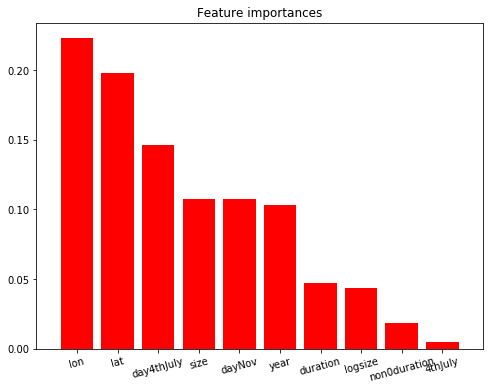

In [94]:
# The plot was incorrect

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train2.shape[1]), X_train2.columns.values[indices], rotation=15)
plt.xlim([-1, X_train2.shape[1]])
plt.show()

The result is better, but it is because I let it train longer. The new feature logsize, non0duration and 4thJuly are not important.

# Use weather data to improve accuracy

In [ ]:
# Do not reevaluate!!!

import rasterio
import numpy.ma as ma

nx, ny = 140, 62
ybin = np.linspace(0,621,ny, dtype=int)
xbin = np.linspace(0,1405,nx, dtype=int)
ds = rasterio.open('PRISMdaily\PRISM_ppt_stable_4kmD2_19920101_bil.bil')
affine = ds.affine
data = ds.read(1)
latbin = ybin*affine[4]+affine[5]
longbin = xbin*affine[0]+affine[2]
loc = []
for ix in range(nx-1):
    for iy in range(ny-1):
        # Verify we have a full cell.
        inputData0 = data[ybin[iy]:ybin[iy+1],xbin[ix]:xbin[ix+1]]
        if np.all(inputData0==-9999.):
            continue
        loc.append((ix, iy))
loc = np.array(loc)

np.save('FullLocData', loc, allow_pickle=True, fix_imports=False)

In [ ]:
# Do not reevaluate!!! I have the weather data for 8 years. 1992-2000

nyear = 8
nleapday = 2

# Split data into region of latitude and longitude.
nx, ny = 140, 62 # Need to be the same as when I produced LocalizationData.npy
ybin = np.linspace(0,621,ny, dtype=int)
xbin = np.linspace(0,1405,nx, dtype=int)
loc = np.load('FullLocData.npy') # Shape: 4925 xy bins, 2 channel. Integer value

# day
nday0 = [31,28,31,30,31,30,31,31,30,31,30,31]
nday1 = [31,29,31,30,31,30,31,31,30,31,30,31]
def nday(year,month):
    if year%4 == 0:
        return nday1[month-1]+1
    else:
        return nday0[month-1]+1

# Prepare input data
weatherData = np.empty(365*nyear+nleapday,4925,4)
itime = 0
for year in range(1992,1992+nyear):
  for month in range(1,13):
    for day in range(1,nday(year,month)):
        itime += 1
        ds1 = rasterio.open('PRISMdaily\PRISM_ppt_stable_4kmD2_'+str(year)+str(month).zfill(2)+str(day).zfill(2)+'_bil.bil')
        ds2 = rasterio.open('PRISMdaily\PRISM_tmax_stable_4kmD1_'+str(year)+str(month).zfill(2)+str(day).zfill(2)+'_bil.bil')
        ds3 = rasterio.open('PRISMdaily\PRISM_tmean_stable_4kmD1_'+str(year)+str(month).zfill(2)+str(day).zfill(2)+'_bil.bil')
        ds4 = rasterio.open('PRISMdaily\PRISM_tmin_stable_4kmD1_'+str(year)+str(month).zfill(2)+str(day).zfill(2)+'_bil.bil')
        data = np.array([ds1.read(1),ds2.read(1),ds3.read(1),ds4.read(1)])
        iloc = 0
        for ix, iy in loc:
            iloc += 1
            weatherData[itime,iloc] = (np.mean(ma.masked_equal(data[:,ybin[iy]:ybin[iy+1],xbin[ix]:xbin[ix+1]],-9999.),axis=(1,2)))
            
np.save('FullweatherData', weatherData, allow_pickle=True, fix_imports=False)

Those 2 last cells compute the average of the weather data from PRISM for bins in latitude and longitude. This data is only for the 48 contiguous states and I have it only from 1992-2000, so I am using only a portion of the fire data with it.

Now that the data is saved, I can just load it with the next cell.

In [96]:
import rasterio
# Load weather data
weatherData = np.load('FullweatherData.npy')
# Order: ppt, tmax, tmean, tmin

# Load loc
ds = rasterio.open('PRISMdaily\PRISM_ppt_stable_4kmD2_19920101_bil.bil')
affine = ds.affine
loc = np.load('FullLocData.npy')

# Change loc to give latitude and longitude
ix = loc[:,0]
iy = loc[:,1]
nx, ny = 140, 62 # Need to be the same as when I produced FullLocData.npy
ybin = np.linspace(0,621,ny, dtype=int)
xbin = np.linspace(0,1405,nx, dtype=int)
yloc = ybin[iy]
xloc = xbin[ix]

xtobin = {}
prevx = xloc[0]
istart = 0
for i, x in enumerate(xloc[1:]):
    if x != prevx:
        xtobin[prevx] = (istart, i)
        istart = i+1
    prevx = x
xtobin[prevx] = (istart, len(xloc)-1)

# Load new dataframe for fire data with condition such that I can use the weather data
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
c = conn.cursor()
c.execute('''SELECT DISCOVERY_DATE, CONT_DATE-DISCOVERY_DATE, FIRE_SIZE, LATITUDE, LONGITUDE, STAT_CAUSE_DESCR 
FROM FIRES''')
rows = c.fetchall()
df = pd.DataFrame(rows)
df.columns = ['stime', 'duration', 'size', 'lat', 'lon', 'cause']

# drop Alaska, Hawaii, Puerto Rico
df = df[df['lon']>-130.]
df = df[df['lat']>24.]
df = df[df['lat']<50.]

epoch = pd.to_datetime(0).to_julian_date()
df['stime'] = pd.to_datetime(df['stime']-epoch, unit='D')

# I only want fire which starts after at least one month in 1992 and before 2000 right now
df = df[(df['stime']<pd.to_datetime('2000-01-01')) & 
        (df['stime']>pd.to_datetime('1992-01-31'))].copy()

def binarysearch(lon,xbin,beg,end):
    if beg == end:
        return xtobin[xbin[beg]]
    if beg == end-1 and lon < xbin[end]:
        return xtobin[xbin[beg]]
    center = (beg+end)//2
    value = xbin[center]
    if lon >= value:
        return binarysearch(lon,xbin,center,end)
    return binarysearch(lon,xbin,beg,center)
    
def binarysearch2(lon,xbin,beg,end):
    if beg == end:
        return beg
    if beg == end-1:
        if lon == xbin[end]:
            return end
        return beg
    center = (beg+end)//2
    value = xbin[center]
    if lon >= value:
        return binarysearch2(lon,xbin,center,end)
    return binarysearch2(lon,xbin,beg,center)

def findxybin(lon,lat):
    beg, end = binarysearch(lon,xbin,0,len(xbin)-1)
    if lat > yloc[end]:
        return end
    return binarysearch2(lat,yloc,beg,end)

# Convert longitude latitude to the bin value
lonarray = (df['lon'].values - affine[2])//affine[0]
latarray = (df['lat'].values - affine[5])//affine[4]

xybinarray = np.vectorize(findxybin,otypes=[int])(lonarray,latarray)

def findtime(arr):
    # time is number of day since 1992-01-01
    return (arr - pd.to_datetime('1992-01-01')).dt.days
    
tarray = findtime(df['stime'])

xybinarray is the number of the position bin in the weatherData array for each row of the dataframe.

tarray is the number of day since 1992-01-01 for each row of the dataframe.

Thus weatherData[tarray, xybinarray,:] is the weather data for each row of the dataframe.

In [97]:
df['sppt'] = weatherData[tarray, xybinarray,0]
df['stmax'] = weatherData[tarray, xybinarray,1]
df['stmean'] = weatherData[tarray, xybinarray,2]
df['stmin'] = weatherData[tarray, xybinarray,3]

# Look at accumulated precipitation since 30 days and mean temperature
df['1mppt'] = df['sppt']
df['1mtmax'] = df['stmax']
df['1mtmean'] = df['stmean']
df['1mtmin'] = df['stmin']
for i in range(1,31):
    df['1mppt'] += weatherData[tarray-i, xybinarray,0]
    df['1mtmax'] += weatherData[tarray-i, xybinarray,1]
    df['1mtmean'] += weatherData[tarray-i, xybinarray,2]
    df['1mtmin'] += weatherData[tarray-i, xybinarray,3]
    
df['1mtmax'] /= 31
df['1mtmean'] /= 31
df['1mtmin'] /= 31

# include tarray and xybinarray so I can add new feature if needed
df['tarray'] = tarray
df['xybinarray'] = xybinarray

display(df.head())

,stime,duration,size,lat,lon,cause,sppt,stmax,stmean,stmin,1mppt,1mtmax,1mtmean,1mtmin
41875,1992-05-19,0.0,1.0,45.360000,-113.078333,Lightning,2.5980,18.638401,10.822249,3.006100,30.174900,12.500200,5.009571,-2.481058
41876,1992-08-05,1.0,0.6,44.540000,-112.683333,Lightning,0.0000,27.241899,17.828499,8.415101,31.727501,22.212835,14.421265,6.629694
41877,1992-10-05,2.0,0.1,44.516667,-112.983333,Campfire,3.8320,6.832300,2.343850,-2.144600,33.714502,15.282151,8.095668,0.909184
41878,1992-10-24,0.0,0.1,44.690000,-112.730000,Campfire,0.0000,16.013401,7.680300,-0.652800,10.670601,14.517545,7.287216,0.056887
41879,1992-06-07,0.0,0.1,45.763333,-112.820000,Campfire,1.2847,14.848999,6.683400,-1.482200,42.226999,15.437877,7.784463,0.131048


In [98]:
# Create time feature

df['day'] = df['stime'].dt.dayofyear
df['year'] = df['stime'].dt.year
def f(x):
    if x['year'] % 4 == 0:
        return x['day']-186
    else:
        return x['day']-185
df['doy4thJuly'] = df.apply(f,axis=1)
def f2(x):
    if x['year'] % 4 == 0:
        if x['day'] < 306:
            return x['day']
        else:
            return x['day']-366
    else:
        if x['day'] < 305:
            return x['day']
        else:
            return x['day']-365
df['doyNov'] = df.apply(f2,axis=1)

Now that I have features using the weather data, I can train a new classifier. However, I have less examples than before since I removed the fire after 2000 and in Alaska, Hawaii and Porto Rico.

In [113]:
from sklearn.model_selection import train_test_split
train_df = (df.drop('cause',axis=1).drop('stime',axis=1))
X, X_test, y, y_test = train_test_split(
    train_df, df['cause']=='Lightning', test_size=0.02, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, shuffle=True)

display(X_train.describe())
display(X_train.head())
display(y_train.describe())
display(y_train.head())

print(len(X_train))
print(len(X_val))
print(len(X_test))
print(sum(y_train)) # true is 1, so it's the number of lightning
print(sum(y_val))
print(sum(y_test))

,duration,size,lat,lon,sppt,stmax,stmean,stmin,1mppt,1mtmax,1mtmean,1mtmin,day,year,doy4thJuly,doyNov,tarray,xybinarray
count,269053.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000,497128.000000
mean,0.629842,39.725539,36.728921,-96.171764,0.651461,24.234476,16.367729,8.500982,62.578057,22.365062,15.190921,8.016780,168.524229,1995.650273,-16.721828,140.375483,1501.146646,2776.154322
std,19.322387,1066.075547,5.312592,15.741022,2.613983,8.206791,7.822808,7.822353,55.573419,8.060373,7.571054,7.291185,88.039354,2.308419,88.081582,89.575953,854.127154,1624.588348
min,0.000000,0.000100,24.651900,-124.718610,0.000000,-19.353100,-25.434546,-32.868275,0.000000,-8.124116,-15.109593,-22.736458,1.000000,1992.000000,-185.000000,-60.000000,31.000000,1.000000
25%,0.000000,0.100000,33.033333,-111.922592,0.000000,18.648719,10.653087,2.480000,18.628180,16.333303,9.549135,2.659589,93.000000,1994.000000,-92.000000,75.000000,808.000000,1081.000000
50%,0.000000,1.000000,35.165000,-90.233938,0.000000,25.051308,16.834637,8.603608,49.304700,22.726503,15.198986,7.565084,169.000000,1996.000000,-16.000000,140.000000,1514.000000,3479.000000
75%,0.000000,4.000000,40.065000,-82.529167,0.019200,30.527099,22.301851,14.210401,92.461000,28.898022,20.947006,13.098500,234.000000,1998.000000,48.000000,214.000000,2300.000000,4216.000000
max,4018.000000,231389.000000,49.314299,-66.999999,133.091644,48.522202,39.701603,31.889064,778.728388,44.294205,36.269913,29.252560,366.000000,1999.000000,180.000000,305.000000,2921.000000,4924.000000


,duration,size,lat,lon,sppt,stmax,stmean,stmin,1mppt,1mtmax,1mtmean,1mtmin,day,year,doy4thJuly,doyNov,tarray,xybinarray
464686,NaN,0.1,43.804613,-115.960826,0.0,24.571400,13.973999,3.376600,0.000000,23.137587,14.132458,5.127329,278,1999,93,278,2834,672
1323328,0.0,0.2,37.312612,-81.127637,0.0,6.319800,-1.080100,-8.480000,59.978900,9.594452,4.647534,-0.299384,323,1997,138,-42,2149,4353
860242,NaN,2.0,33.188300,-93.293100,0.0,35.477699,27.565447,19.653200,86.610106,34.717445,27.936094,21.154742,252,1998,67,252,2443,3156
1094487,NaN,0.1,41.751944,-124.183056,0.0,25.654212,18.663895,11.673579,0.758632,26.010917,18.986202,11.961487,239,1998,54,239,2430,32
231421,0.0,4.0,33.700100,-104.133900,0.0,36.915905,26.205183,15.494454,3.562455,34.810323,24.991816,15.173311,162,1996,-24,162,1622,1867


count     497128
unique         2
top        False
freq      420554
Name: cause, dtype: object

464686     False
1323328    False
860242     False
1094487    False
231421      True
Name: cause, dtype: bool

497128
55237
11273
76574
8309
1685


[0]	validation_0-error:0.08239
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.071818
[2]	validation_0-error:0.072216
[3]	validation_0-error:0.066278
[4]	validation_0-error:0.065916
[5]	validation_0-error:0.065355
[6]	validation_0-error:0.065192
[7]	validation_0-error:0.064775
[8]	validation_0-error:0.064685
[9]	validation_0-error:0.061462
[10]	validation_0-error:0.059706
[11]	validation_0-error:0.059797
[12]	validation_0-error:0.059815
[13]	validation_0-error:0.058747
[14]	validation_0-error:0.057824
[15]	validation_0-error:0.056502
[16]	validation_0-error:0.056611
[17]	validation_0-error:0.056538
[18]	validation_0-error:0.056411
[19]	validation_0-error:0.056285
[20]	validation_0-error:0.055923
[21]	validation_0-error:0.054981
[22]	validation_0-error:0.055144
[23]	validation_0-error:0.054203
[24]	validation_0-error:0.05442
[25]	validation_0-error:0.054692
[26]	validation_0-error:0.054583
[27]	validation_0-error:0.053605
[28]	validation_0-erro

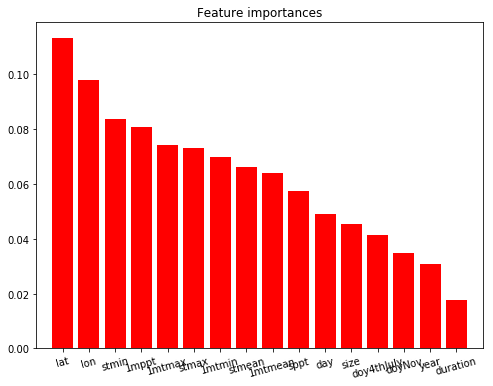

In [100]:
param={'colsample_bytree': 0.6109974234101829, 'gamma': 0.5813428137707901, 
       'learning_rate': 0.2273733653102295, 'max_depth': 12, 'min_child_weight': 2.0, 
       'subsample': 0.4611380635185053,
 'nthread' : -1}
clf = XGBClassifier(**param, n_estimators=1000)
def fitandplot(X_train, X_val, clf):
    clf.fit(X = X_train.values, y = y_train.values, eval_metric='error', early_stopping_rounds=30, 
                    eval_set = [(X_val.values, y_val.values)], verbose=True)
    print(min(clf2.evals_result()['validation_0']['error'])) # I should have clf not clf2, anyway the information is given by verbose.

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.rcParams['text.usetex']=False
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices], rotation=15)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    
# drop tarray and xybinarray 
fitandplot(X_train.drop(['tarray','xybinarray'],axis=1), X_val.drop(['tarray','xybinarray'],axis=1), clf)

The result improved thanks to the weather data even though the number of training examples is significantly less (497128 rather than 1768577, that is 28%). All the weather data were important, just after latitude and longitude. Obviously, the day feature might be lower because there are 3 features with similar information.

In [104]:
# test error
from sklearn import metrics
y_pred = clf.predict(X_test.drop(['tarray','xybinarray'],axis=1).values)
print('error: ',1-metrics.accuracy_score(y_test.values, y_pred))

error:  0.05127295307371593


C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [115]:
# Create new feature

def moddf(df):
    # Look at accumulated precipitation and mean temperature for 1 and 2 weeks.
    tarray = df['tarray'].values
    xybinarray = df['xybinarray'].values

    df['1wppt'] = df['sppt']
    df['1wtmax'] = df['stmax']
    df['1wtmean'] = df['stmean']
    df['1wtmin'] = df['stmin']
    for i in range(1,7):
        df['1wppt'] += weatherData[tarray-i, xybinarray,0]
        df['1wtmax'] += weatherData[tarray-i, xybinarray,1]
        df['1wtmean'] += weatherData[tarray-i, xybinarray,2]
        df['1wtmin'] += weatherData[tarray-i, xybinarray,3]

    df['1wtmax'] /= 7
    df['1wtmean'] /= 7
    df['1wtmin'] /= 7
    
    df['2wppt'] = df['sppt']
    df['2wtmax'] = df['stmax']
    df['2wtmean'] = df['stmean']
    df['2wtmin'] = df['stmin']
    for i in range(1,14):
        df['2wppt'] += weatherData[tarray-i, xybinarray,0]
        df['2wtmax'] += weatherData[tarray-i, xybinarray,1]
        df['2wtmean'] += weatherData[tarray-i, xybinarray,2]
        df['2wtmin'] += weatherData[tarray-i, xybinarray,3]

    df['2wtmax'] /= 14
    df['2wtmean'] /= 14
    df['2wtmin'] /= 14
    return df

X_train2 = moddf(X_train.copy())
X_val2 = moddf(X_val.copy())

[0]	validation_0-error:0.080978
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.066912
[2]	validation_0-error:0.063635
[3]	validation_0-error:0.062567
[4]	validation_0-error:0.061987
[5]	validation_0-error:0.061191
[6]	validation_0-error:0.060467
[7]	validation_0-error:0.059924
[8]	validation_0-error:0.05862
[9]	validation_0-error:0.058855
[10]	validation_0-error:0.057715
[11]	validation_0-error:0.057552
[12]	validation_0-error:0.057099
[13]	validation_0-error:0.056411
[14]	validation_0-error:0.056375
[15]	validation_0-error:0.056176
[16]	validation_0-error:0.055705
[17]	validation_0-error:0.055271
[18]	validation_0-error:0.055036
[19]	validation_0-error:0.054275
[20]	validation_0-error:0.054293
[21]	validation_0-error:0.054022
[22]	validation_0-error:0.053642
[23]	validation_0-error:0.053497
[24]	validation_0-error:0.053461
[25]	validation_0-error:0.05337
[26]	validation_0-error:0.05261
[27]	validation_0-error:0.052338
[28]	validation_0-error

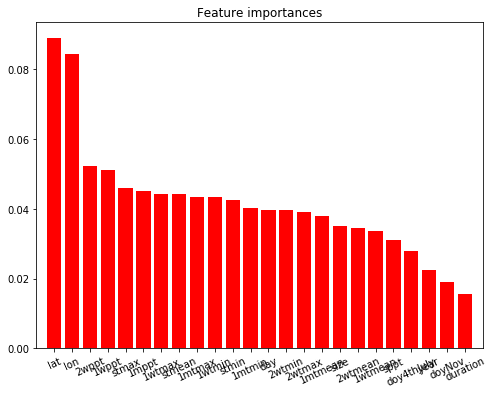

In [117]:
param={'colsample_bytree': 0.6109974234101829, 'gamma': 0.5813428137707901, 
       'learning_rate': 0.2273733653102295, 'max_depth': 12, 'min_child_weight': 2.0, 
       'subsample': 0.4611380635185053,
 'nthread' : -1}
clf2 = XGBClassifier(**param, n_estimators=1000)
def fitandplot(X_train, X_val, clf):
    clf.fit(X = X_train.values, y = y_train.values, eval_metric='error', early_stopping_rounds=30, 
                    eval_set = [(X_val.values, y_val.values)], verbose=True)
    print(min(clf.evals_result()['validation_0']['error']))

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.rcParams['text.usetex']=False
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices], rotation=25)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    
fitandplot(X_train2.drop(['tarray','xybinarray'],axis=1), X_val2.drop(['tarray','xybinarray'],axis=1), clf2)

In [121]:
X_test2 = moddf(X_test.copy())
y_pred = clf2.predict(X_test2.drop(['tarray','xybinarray'],axis=1).values)
print('error: ',1-metrics.accuracy_score(y_test.values, y_pred))

error:  0.045152133416127005


C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Predict whether or not there will be fire at one time and one position

To predict if there will be fire, I can only use lat, lon, time data and weather data. I must drop size, cause and duration. Also, it seems that the variation of 'day' are not very useful, and neither is 'year' 

I will first try to predict the fires caused by lightning.

I will generate random time and position for the value in which there is no fire.

In [132]:
firepredict = moddf(df[df['cause']=='Lightning'].copy().drop(['size','duration', 'cause', 'doyNov','doy4thJuly','year','stime'],axis=1))

In [137]:
print(firepredict['lat'].min())
print(firepredict['lat'].max()-firepredict['lat'].min())
print(firepredict['lon'].min())
print(firepredict['lon'].max()-firepredict['lon'].min())
print(firepredict['tarray'].min())
print(firepredict['tarray'].max())
len(firepredict)

24.7166667
24.597632299999997
-124.38833333
57.18833744
34
2921


86568

In [159]:
arr = np.stack([24.597632299999997*np.random.rand(86568)+24.7166667,
                                  57.18833744*np.random.rand(86568)-124.38833333,
                                  np.random.randint(34,2921,size=86568)], axis=1)
print(arr.shape)
fakefire = pd.DataFrame(arr, columns=['lat','lon','tarray'])
fakefire['tarray'] = fakefire['tarray'].astype(int)

fakefire['day'] = fakefire['tarray'].apply(lambda x: (pd.Timedelta(x,'D') + pd.to_datetime('1992-01-01')).dayofyear)

# get xybin
lonarray = (fakefire['lon'].values - affine[2])//affine[0]
latarray = (fakefire['lat'].values - affine[5])//affine[4]
fakefire['xybinarray'] = np.vectorize(findxybin,otypes=[int])(lonarray,latarray)

# get weather data
def moddf(df):
    tarray = df['tarray'].values
    xybinarray = df['xybinarray'].values
    
    df['sppt'] = weatherData[tarray, xybinarray,0]
    df['stmax'] = weatherData[tarray, xybinarray,1]
    df['stmean'] = weatherData[tarray, xybinarray,2]
    df['stmin'] = weatherData[tarray, xybinarray,3]

    # Look at accumulated precipitation since 30 days and mean temperature
    df['1mppt'] = df['sppt']
    df['1mtmax'] = df['stmax']
    df['1mtmean'] = df['stmean']
    df['1mtmin'] = df['stmin']
    for i in range(1,31):
        df['1mppt'] += weatherData[tarray-i, xybinarray,0]
        df['1mtmax'] += weatherData[tarray-i, xybinarray,1]
        df['1mtmean'] += weatherData[tarray-i, xybinarray,2]
        df['1mtmin'] += weatherData[tarray-i, xybinarray,3]

    df['1mtmax'] /= 31
    df['1mtmean'] /= 31
    df['1mtmin'] /= 31

    df['1wppt'] = df['sppt']
    df['1wtmax'] = df['stmax']
    df['1wtmean'] = df['stmean']
    df['1wtmin'] = df['stmin']
    for i in range(1,7):
        df['1wppt'] += weatherData[tarray-i, xybinarray,0]
        df['1wtmax'] += weatherData[tarray-i, xybinarray,1]
        df['1wtmean'] += weatherData[tarray-i, xybinarray,2]
        df['1wtmin'] += weatherData[tarray-i, xybinarray,3]

    df['1wtmax'] /= 7
    df['1wtmean'] /= 7
    df['1wtmin'] /= 7
    
    df['2wppt'] = df['sppt']
    df['2wtmax'] = df['stmax']
    df['2wtmean'] = df['stmean']
    df['2wtmin'] = df['stmin']
    for i in range(1,14):
        df['2wppt'] += weatherData[tarray-i, xybinarray,0]
        df['2wtmax'] += weatherData[tarray-i, xybinarray,1]
        df['2wtmean'] += weatherData[tarray-i, xybinarray,2]
        df['2wtmin'] += weatherData[tarray-i, xybinarray,3]

    df['2wtmax'] /= 14
    df['2wtmean'] /= 14
    df['2wtmin'] /= 14
    return df

fakefire = moddf(fakefire)

# align columns
firepredict, fakefire = firepredict.align(fakefire,axis=1,copy=False)

(86568, 3)


In [161]:
fakefire['fire']=False
firepredict['fire']=True
train_df = pd.concat([fakefire,firepredict])
X, X_test, y, y_test = train_test_split(
    train_df.drop('fire',axis=1), train_df['fire'], test_size=0.02, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, shuffle=True)

display(X_train.describe())
display(X_train.head())
display(y_train.describe())
display(y_train.head())

print(len(X_train))
print(len(X_val))
print(len(X_test))
print(sum(y_train)) # true is 1, so it's the number of lightning
print(sum(y_val))
print(sum(y_test))

,1mppt,1mtmax,1mtmean,1mtmin,1wppt,1wtmax,1wtmean,1wtmin,2wppt,2wtmax,...,2wtmin,day,lat,lon,sppt,stmax,stmean,stmin,tarray,xybinarray
count,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,...,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000,152705.000000
mean,55.147713,22.703667,15.637130,8.570592,12.265020,23.388448,16.238835,9.089221,24.597687,23.073273,...,8.854237,195.794977,38.155389,-102.705131,2.065061,23.656617,16.552818,9.449020,1478.486638,2042.667306
std,59.227294,9.250295,8.498534,8.182065,19.529386,9.825885,8.936451,8.527989,31.940992,9.529488,...,8.351383,79.046510,6.529459,16.172113,5.503060,10.345280,9.337616,8.896053,840.451862,1612.631112
min,0.000000,-18.289437,-23.889489,-30.905591,0.000000,-24.824969,-31.030081,-37.235189,0.000000,-21.494151,...,-34.883701,1.000000,24.717053,-124.388333,0.000000,-30.121897,-35.238778,-41.984798,34.000000,3.000000
25%,13.861545,18.087016,11.638624,4.473968,0.582100,18.411071,11.950527,4.728633,3.430545,18.363093,...,4.692403,154.000000,33.333333,-115.747791,0.000000,18.301001,11.976000,4.922637,836.000000,700.000000
50%,36.595000,24.839309,16.988108,9.058858,4.967727,25.780329,17.874690,9.848371,13.581300,25.340377,...,9.483950,206.000000,38.595800,-108.361667,0.022900,26.280001,18.396700,10.449231,1478.000000,1431.000000
75%,78.157819,29.183329,21.073238,13.427419,16.077300,30.477048,22.163778,14.300117,34.390002,29.844728,...,13.871148,241.000000,43.798333,-88.099122,1.647600,31.170364,22.945898,15.124298,2234.000000,3700.000000
max,1031.417869,44.650174,36.202519,29.186351,511.798591,47.336714,37.728706,30.061572,627.749997,45.984050,...,29.420351,366.000000,49.314299,-67.200268,356.037012,48.304398,39.701603,31.098804,2921.000000,4924.000000


,1mppt,1mtmax,1mtmean,1mtmin,1wppt,1wtmax,1wtmean,1wtmin,2wppt,2wtmax,...,2wtmin,day,lat,lon,sppt,stmax,stmean,stmin,tarray,xybinarray
238354,32.516301,25.714080,17.275482,8.836884,12.199300,27.211685,18.862672,10.513657,15.510100,27.127450,...,10.687857,218,43.950000,-108.800700,0.000000,29.208899,19.574352,9.939800,948,1373
217919,25.638201,21.680051,14.020851,6.361652,3.599500,23.114272,15.130472,7.146671,3.599500,22.719314,...,6.228157,188,41.133200,-119.917700,0.000000,26.828604,18.110601,9.392599,2014,332
955779,160.643633,31.941278,26.771696,21.602114,11.326454,34.452429,28.739180,23.025934,67.780906,33.512590,...,22.362084,186,29.010000,-81.500000,1.703818,36.365543,29.300997,22.236454,2012,4332
200122,74.578500,28.754665,20.667158,12.579652,14.829700,28.970757,20.801436,12.632114,41.969799,28.638114,...,12.559986,228,34.200000,-110.300700,1.681600,30.293098,21.749901,13.206699,227,1268
77072,11.210499,26.055100,16.844766,7.634432,0.000000,30.313857,19.106065,7.898271,1.189500,28.453235,...,8.455629,177,35.491667,-111.516667,0.000000,32.184200,21.911850,11.639501,1272,1137


count     152705
unique         2
top         True
freq       76402
Name: fire, dtype: object

238354    True
217919    True
955779    True
200122    True
77072     True
Name: fire, dtype: bool

152705
16968
3463
76402
8498
1668


[0]	validation_0-error:0.085632
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.081506
[2]	validation_0-error:0.080033
[3]	validation_0-error:0.078088
[4]	validation_0-error:0.078383
[5]	validation_0-error:0.076909
[6]	validation_0-error:0.076025
[7]	validation_0-error:0.076674
[8]	validation_0-error:0.076438
[9]	validation_0-error:0.075849
[10]	validation_0-error:0.07467
[11]	validation_0-error:0.072902
[12]	validation_0-error:0.072784
[13]	validation_0-error:0.071782
[14]	validation_0-error:0.071782
[15]	validation_0-error:0.070603
[16]	validation_0-error:0.07078
[17]	validation_0-error:0.071016
[18]	validation_0-error:0.071252
[19]	validation_0-error:0.070898
[20]	validation_0-error:0.071252
[21]	validation_0-error:0.069719
[22]	validation_0-error:0.069778
[23]	validation_0-error:0.068953
[24]	validation_0-error:0.068541
[25]	validation_0-error:0.068835
[26]	validation_0-error:0.068187
[27]	validation_0-error:0.067775
[28]	validation_0-erro

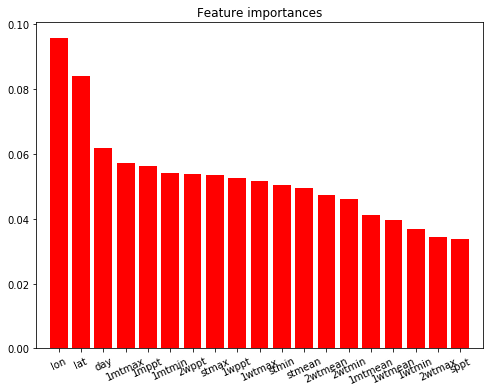

In [162]:
param={'colsample_bytree': 0.6109974234101829, 'gamma': 0.5813428137707901, 
       'learning_rate': 0.2273733653102295, 'max_depth': 12, 'min_child_weight': 2.0, 
       'subsample': 0.4611380635185053,
 'nthread' : -1}
clf = XGBClassifier(**param, n_estimators=1000)
def fitandplot(X_train, X_val, y_train, y_val, clf):
    clf.fit(X = X_train.values, y = y_train.values, eval_metric='error', early_stopping_rounds=30, 
                    eval_set = [(X_val.values, y_val.values)], verbose=True)
    print(min(clf.evals_result()['validation_0']['error']))

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.rcParams['text.usetex']=False
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices], rotation=25)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    
fitandplot(X_train.drop(['tarray','xybinarray'],axis=1), X_val.drop(['tarray','xybinarray'],axis=1), clf)

In [165]:
def hypersearch(X_train, X_val, trials=trials):
    def objective(space):
        param={'learning_rate' : space['learning_rate'],
         'max_depth' : int(space['max_depth']),
         'min_child_weight' : space['min_child_weight'],
            'gamma' : space['gamma'],
         'subsample' : space['subsample'],
         'colsample_bytree' :space['colsample_bytree'],
         'nthread' : -1
              }
        start_time = time()
        clf = XGBClassifier(**param, n_estimators=1000)
        clf.fit(X = X_train.values, y = y_train.values, eval_metric='error', early_stopping_rounds=30, 
                        eval_set = [(X_val.values, y_val.values)], verbose=False)
        error = min(clf.evals_result()['validation_0']['error'])
        print(time() - start_time, error)
        return{'loss':error, 'status': STATUS_OK }


    space ={
            'max_depth': hp.quniform ('max_depth', 1, 14, 1),
            'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
            'subsample': hp.uniform ('subsample', 0.1, 1.),
            'learning_rate' : hp.uniform ('learning_rate', 0.01, 0.5),
           'colsample_bytree': hp.uniform ('colsample_bytree', 0.5, 1.),
            'gamma': hp.uniform ('gamma', 0., 1.)
        }

    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=50,
                trials=trials)

    best['max_depth'] = int(best['max_depth'])
    print(best)
    
trials = Trials()
hypersearch(X_train.drop(['tarray','xybinarray'],axis=1), X_val.drop(['tarray','xybinarray'],axis=1))

17.92140793800354 0.070132
47.99071788787842 0.066301
6.4174017906188965 0.069661
9.677985906600952 0.066832
13.305526494979858 0.065417
3.3337044715881348 0.075495
40.406742334365845 0.063001
5.66089653968811 0.074729
16.05270028114319 0.075672
6.8768837451934814 0.070309
8.800201654434204 0.068777
10.040645599365234 0.072018
13.621512174606323 0.069896
12.427246809005737 0.074729
9.057655096054077 0.06695
14.384158849716187 0.068894
12.827948808670044 0.063708
7.947062730789185 0.072725
10.644386291503906 0.066655
32.0986750125885 0.062235
48.94503331184387 0.062471
43.19344687461853 0.060408
41.03647422790527 0.061115
43.770102977752686 0.06029
42.9815673828125 0.061587
36.705424785614014 0.067362
42.190953731536865 0.061704
46.63676738739014 0.060761
57.3959276676178 0.059642
47.81893563270569 0.060349
35.25971293449402 0.062412
24.039749145507812 0.062058
25.808107614517212 0.061704
60.71918296813965 0.064592
16.37296986579895 0.065182
3.980315923690796 0.07243
12.803455352783203 

[0]	validation_0-error:0.079738
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.07414
[2]	validation_0-error:0.073904
[3]	validation_0-error:0.072725
[4]	validation_0-error:0.071664
[5]	validation_0-error:0.071193
[6]	validation_0-error:0.070662
[7]	validation_0-error:0.07025
[8]	validation_0-error:0.069661
[9]	validation_0-error:0.068835
[10]	validation_0-error:0.069602
[11]	validation_0-error:0.068894
[12]	validation_0-error:0.068482
[13]	validation_0-error:0.068246
[14]	validation_0-error:0.068305
[15]	validation_0-error:0.068128
[16]	validation_0-error:0.067716
[17]	validation_0-error:0.067657
[18]	validation_0-error:0.067598
[19]	validation_0-error:0.067421
[20]	validation_0-error:0.067421
[21]	validation_0-error:0.066242
[22]	validation_0-error:0.066419
[23]	validation_0-error:0.065889
[24]	validation_0-error:0.065123
[25]	validation_0-error:0.065299
[26]	validation_0-error:0.065358
[27]	validation_0-error:0.064946
[28]	validation_0-erro

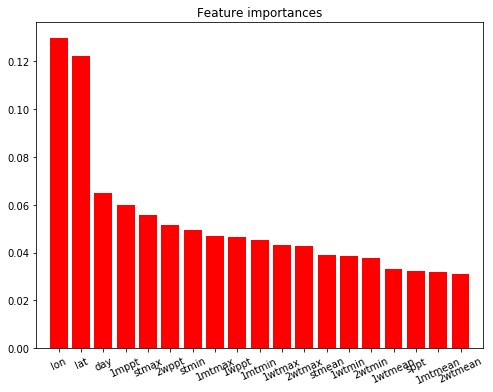

In [170]:
param={'colsample_bytree': 0.9159733040936587, 'gamma': 0.25308038156741863, 'learning_rate': 0.1324787866081471, 
       'max_depth': 14, 'min_child_weight': 3.0, 'subsample': 0.8953086478694213}
clf = XGBClassifier(**param, nthread = -1, n_estimators=1000)   
fitandplot(X_train.drop(['tarray','xybinarray'],axis=1), X_val.drop(['tarray','xybinarray'],axis=1), clf)

In [168]:
# With parameters alpha, lambda and colsample_bylevel

def hypersearch2(X_train, X_val, y_train, y_val, trials, max_evals):
    def objective(space):
        param={'learning_rate' : space['learning_rate'],
         'max_depth' : int(space['max_depth']),
         'min_child_weight' : space['min_child_weight'],
            'gamma' : space['gamma'],
         'subsample' : space['subsample'],
         'colsample_bytree' :space['colsample_bytree'],
         'nthread' : -1,
               'reg_alpha' : space['reg_alpha'],
               'reg_lambda' : space['reg_lambda'],
               'colsample_bylevel': space['colsample_bylevel']
              }
        start_time = time()
        clf = XGBClassifier(**param, n_estimators=1000)
        clf.fit(X = X_train.values, y = y_train.values, eval_metric='error', early_stopping_rounds=30, 
                        eval_set = [(X_val.values, y_val.values)], verbose=False)
        error = min(clf.evals_result()['validation_0']['error'])
        print(time() - start_time, error)
        return{'loss':error, 'status': STATUS_OK }


    space ={
            'max_depth': hp.quniform ('max_depth', 1, 18, 1),
            'min_child_weight': hp.quniform ('min_child_weight', 1, 10, 1),
            'subsample': hp.uniform ('subsample', 0.1, 1.),
            'learning_rate' : hp.uniform ('learning_rate', 0.01, 0.5),
           'colsample_bytree': hp.uniform ('colsample_bytree', 0.5, 1.),
            'gamma': hp.uniform ('gamma', 0., 1.),
        'reg_alpha': hp.uniform ('reg_alpha', 0., 1.),
        'reg_lambda': hp.uniform ('reg_lambda', 0., 1.),
        'colsample_bylevel': hp.uniform ('colsample_bylevel', 0.5, 1.)
        }

    best = fmin(fn=objective,
                space=space,
                algo=tpe.suggest,
                max_evals=max_evals,
                trials=trials)

    best['max_depth'] = int(best['max_depth'])
    print(best)
    
trials2 = Trials()
hypersearch2(X_train.drop(['tarray','xybinarray'],axis=1), X_val.drop(['tarray','xybinarray'],axis=1),trials2, 50)

4.871553182601929 0.073786
7.03230881690979 0.072195
9.481629610061646 0.075849
7.944154977798462 0.06913
27.486265182495117 0.062412
20.48950219154358 0.068953
4.762237787246704 0.072843
7.605057001113892 0.069484
16.524020433425903 0.064356
12.599194526672363 0.070603
6.8136372566223145 0.075672
5.134284496307373 0.095533
4.451748371124268 0.073314
7.885613203048706 0.083569
22.2204692363739 0.068187
16.145655870437622 0.066301
12.617513179779053 0.066596
8.050499439239502 0.069602
33.309683322906494 0.062058
2.9443862438201904 0.075613
15.817144393920898 0.062942
10.895249128341675 0.06636
31.946943521499634 0.060702
20.110546827316284 0.062235
24.873263597488403 0.061645
16.916337251663208 0.062883
15.914918184280396 0.064533
13.535196304321289 0.064651
20.719765186309814 0.061999
9.422120332717896 0.064298
17.348684072494507 0.063237
11.4315927028656 0.066066
10.978734731674194 0.064474
14.537424087524414 0.065064
18.88446545600891 0.063472
10.309114694595337 0.063944
25.234596252

[0]	validation_0-error:0.080504
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.075554
[2]	validation_0-error:0.074906
[3]	validation_0-error:0.07467
[4]	validation_0-error:0.073491
[5]	validation_0-error:0.071959
[6]	validation_0-error:0.071959
[7]	validation_0-error:0.071134
[8]	validation_0-error:0.071311
[9]	validation_0-error:0.071664
[10]	validation_0-error:0.070545
[11]	validation_0-error:0.069896
[12]	validation_0-error:0.068482
[13]	validation_0-error:0.068482
[14]	validation_0-error:0.067716
[15]	validation_0-error:0.06748
[16]	validation_0-error:0.066478
[17]	validation_0-error:0.066124
[18]	validation_0-error:0.065889
[19]	validation_0-error:0.065948
[20]	validation_0-error:0.065594
[21]	validation_0-error:0.065358
[22]	validation_0-error:0.063472
[23]	validation_0-error:0.06359
[24]	validation_0-error:0.064003
[25]	validation_0-error:0.064062
[26]	validation_0-error:0.064003
[27]	validation_0-error:0.064121
[28]	validation_0-error

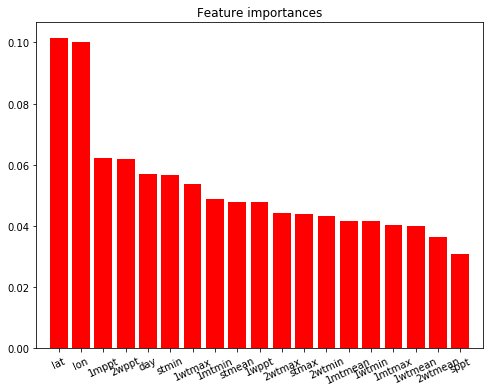

In [172]:
param={'reg_alpha': 0.48151691625499266, 'colsample_bylevel': 0.8364158713489631, 'colsample_bytree': 0.5931376119479917, 
       'gamma': 0.4085526588792945, 'reg_lambda': 0.4358285460273732, 'learning_rate': 0.19811793235794184, 'max_depth': 13, 
       'min_child_weight': 2.0, 'subsample': 0.9570209486205159}
clf = XGBClassifier(**param, nthread = -1, n_estimators=1000)   
fitandplot(X_train.drop(['tarray','xybinarray'],axis=1), X_val.drop(['tarray','xybinarray'],axis=1), clf)

# Predict fires of all causes

In [175]:
firepredict2 = moddf(df.copy().drop(['size','duration', 'cause', 'doyNov','doy4thJuly','year','stime'],axis=1))

def createfake(firepredict):
    s = len(firepredict)
    arr = np.stack([24.597632299999997*np.random.rand(s)+24.7166667,
                                      57.18833744*np.random.rand(s)-124.38833333,
                                      np.random.randint(34,2921,size=s)], axis=1)

    fakefire = pd.DataFrame(arr, columns=['lat','lon','tarray'])
    fakefire['tarray'] = fakefire['tarray'].astype(int)

    fakefire['day'] = fakefire['tarray'].apply(lambda x: (pd.Timedelta(x,'D') + pd.to_datetime('1992-01-01')).dayofyear)

    # get xybin
    lonarray = (fakefire['lon'].values - affine[2])//affine[0]
    latarray = (fakefire['lat'].values - affine[5])//affine[4]
    fakefire['xybinarray'] = np.vectorize(findxybin,otypes=[int])(lonarray,latarray)

    fakefire = moddf(fakefire)

    # align columns
    firepredict, fakefire = firepredict.align(fakefire,axis=1,copy=False)
    
    fakefire['fire']=False
    firepredict['fire']=True
    return pd.concat([fakefire,firepredict])

train_df2 = createfake(firepredict2)
X2, X_test2, y2, y_test2 = train_test_split(
    train_df2.drop('fire',axis=1), train_df2['fire'], test_size=0.02, shuffle=True)
X_train2, X_val2, y_train2, y_val2 = train_test_split(
    X2, y2, test_size=0.1, shuffle=True)

trials3 = Trials()
hypersearch2(X_train2.drop(['tarray','xybinarray'],axis=1), X_val2.drop(['tarray','xybinarray'],axis=1),
             y_train2, y_val2, trials3, 50)

291.92413330078125 0.094295
219.27669024467468 0.134368
126.17205834388733 0.14867
303.57159972190857 0.144461
164.04608011245728 0.098033
480.61884021759033 0.091027
169.81937050819397 0.104831
386.52540707588196 0.093154
735.2570767402649 0.097227
569.5786068439484 0.105175


KeyboardInterrupt: 

In [179]:
hypersearch2(X_train2.drop(['tarray','xybinarray'],axis=1), X_val2.drop(['tarray','xybinarray'],axis=1),
             y_train2, y_val2, trials3, 10)

{'colsample_bylevel': 0.7501177019888027, 'colsample_bytree': 0.8291070503829303, 'gamma': 0.3712264689410901, 'learning_rate': 0.07820296189339045, 'max_depth': 17, 'min_child_weight': 5.0, 'reg_alpha': 0.9998518175523757, 'reg_lambda': 0.5238219352181274, 'subsample': 0.6257283056660621}


[0]	validation_0-error:0.136069
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.130231
[2]	validation_0-error:0.131
[3]	validation_0-error:0.13329
[4]	validation_0-error:0.123587
[5]	validation_0-error:0.12069
[6]	validation_0-error:0.12222
[7]	validation_0-error:0.118672
[8]	validation_0-error:0.11725
[9]	validation_0-error:0.114589
[10]	validation_0-error:0.115042
[11]	validation_0-error:0.115005
[12]	validation_0-error:0.113123
[13]	validation_0-error:0.111765
[14]	validation_0-error:0.109475
[15]	validation_0-error:0.109067
[16]	validation_0-error:0.107547
[17]	validation_0-error:0.107836
[18]	validation_0-error:0.107737
[19]	validation_0-error:0.10742
[20]	validation_0-error:0.106506
[21]	validation_0-error:0.106288
[22]	validation_0-error:0.106605
[23]	validation_0-error:0.106623
[24]	validation_0-error:0.106687
[25]	validation_0-error:0.106813
[26]	validation_0-error:0.105827
[27]	validation_0-error:0.105836
[28]	validation_0-error:0.10

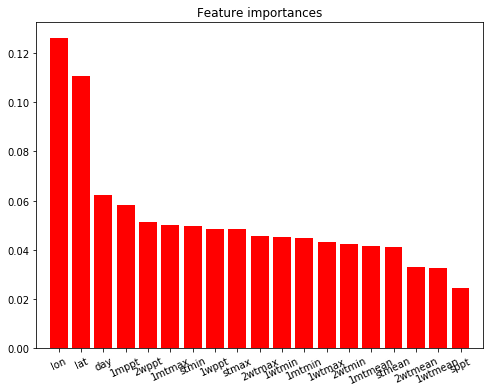

In [180]:
def fitandplot2(X_train, X_val, y_train, y_val, clf):
    clf.fit(X = X_train.values, y = y_train.values, eval_metric='error', early_stopping_rounds=30, 
                    eval_set = [(X_val.values, y_val.values)], verbose=True)
    print(min(clf.evals_result()['validation_0']['error']))

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.rcParams['text.usetex']=False
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", align="center")
    plt.xticks(range(X_train.shape[1]), X_train.columns.values[indices], rotation=25)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

param={'colsample_bylevel': 0.7501177019888027, 'colsample_bytree': 0.8291070503829303, 'gamma': 0.3712264689410901, 'learning_rate': 0.07820296189339045, 'max_depth': 17, 'min_child_weight': 5.0, 'reg_alpha': 0.9998518175523757, 'reg_lambda': 0.5238219352181274, 'subsample': 0.6257283056660621}
clf2 = XGBClassifier(**param, nthread = -1, n_estimators=1000)   
fitandplot2(X_train2.drop(['tarray','xybinarray'],axis=1), X_val2.drop(['tarray','xybinarray'],axis=1), 
            y_train2, y_val2, clf2)

# Show characteristics of fire predictions

In [226]:
y_pred2 = clf2.predict(X_test2.drop(['tarray','xybinarray'],axis=1).values)
acc_df = X_test2[y_test2==y_pred2] # dataframe of the correctly labelled examples
tp_df = X_test2[y_test2 & y_pred2] # true positive
fp_df = X_test2[(~ y_test2) & y_pred2] # false positive
fn_df = X_test2[y_test2 & (~ y_pred2)] # false negative

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [236]:
print('Validation accuracy is: ', 1-0.091027)
print('Test accuracy is: ', len(acc_df)/len(X_test2))
print('Test precision is: ', len(tp_df)/(len(tp_df)+len(fp_df)))
print('Test recall is: ', len(tp_df)/(len(tp_df)+len(fn_df)))

Validation accuracy is:  0.908973
Test accuracy is:  0.9099618557615542
Test precision is:  0.8897386334986134
Test recall is:  0.9364882795223353


The test set accuracy is 91%, the same as the validation accuracy, which means that my validation set ws large enough to avoid overfitting it by early stopping and hyperparameter optimization.

Since the positive and negative cases are balanced, accuracy is a good measure. However, one can also check precision and recall. When my classifier predicts a fire, there is 89% chance it is true, while when there is a fire, there is 94% chance my fire predict it.

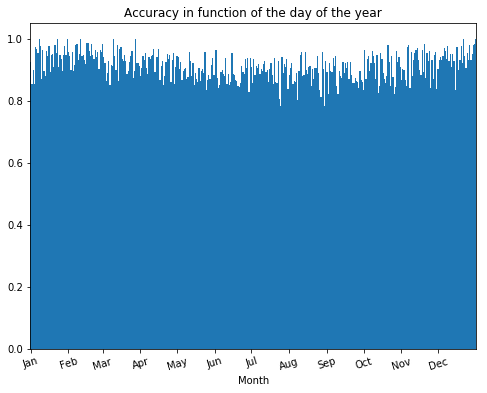

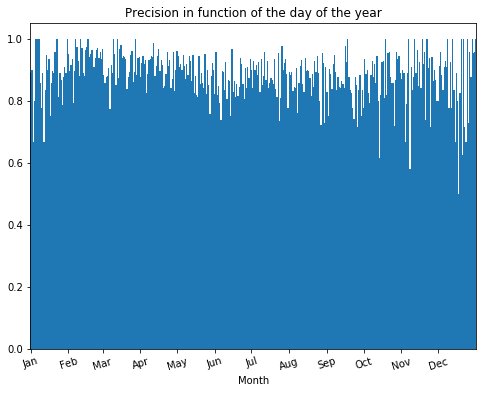

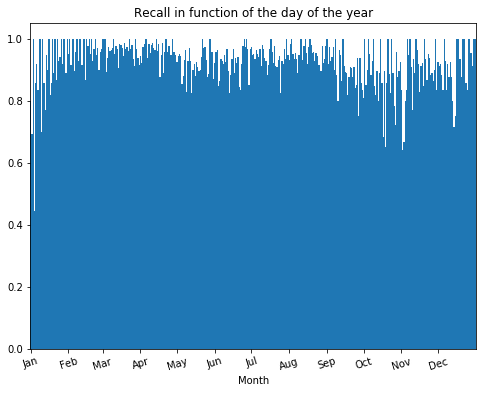

In [234]:
def dayplot2(df1, df,title):
    hist = (df1.groupby(['day']).size()/df.groupby(['day']).size()).values
    width = 1
    center = np.arange(0.5,366.5)
    plt.bar(center, hist, align='edge', width=width)
    month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    # Those numbers don't work for leap year, but it doesn't really matter.
    day =[1,32,60,91,121,152,182,213,244,274,305,335]
    plt.xticks(day, month, rotation=17)
    ax=plt.gca()
    ax.set_xlim((0.5,366.5))
    plt.xlabel('Month')
    plt.title(title+' in function of the day of the year')
    plt.show()

dayplot2(acc_df,X_test2,'Accuracy')
dayplot2(tp_df,pd.concat([tp_df,fp_df]),'Precision')
dayplot2(tp_df,pd.concat([tp_df,fn_df]),'Recall')

The number of examples for each day is not very large in the test set, so it is normal to have a noisy histogram even more so for the recall and precision since they consider only half of the examples.

It seems that the accuracy, precision and recall are around 90% for all days.

In [244]:
print(df['lon'].max(),df['lon'].min(),df['lat'].max(),df['lat'].min())

-66.99999941 -124.71861 49.314299 24.6519


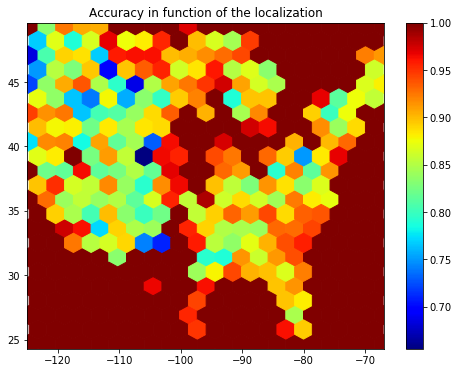

In [257]:
from matplotlib import cm, colors
def mapplot2(df):
    gridsize=20
    plt.hexbin(df['lon'].values, df['lat'].values, (df['truth']==df['pred']).values,
               gridsize=gridsize, reduce_C_function=np.mean, cmap=cm.jet)
    cb = plt.colorbar()
    plt.title('Accuracy in function of the localization')
    ax = plt.gca()
    ax.set_xlim((-125,-66.9))
    ax.set_ylim((24.3,49.6))
    plt.show()
    
map_df = X_test2.copy()
map_df['truth'] = y_test2
map_df['pred'] = y_pred2
mapplot2(map_df)

The fake fires have been generated on a square of longitudes and latitudes without constraining it to US lands. We can see that the accuracy is very good outside US lands which is normal since it is an easy task to learn the US boundaries. 

Those fake fires outside US lands count in the accuracy, so the obtained accuracy is higher that what one would obtain if one would ask a classifier to classify fires which are only in US lands.

There is also a valley of perfect accuracy in the middle of the US which is probably due to a low number of fires in this region which makes that the classifier can get a good accuracy by always predicting false.

The accuracy varies between 65% and 100%.

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


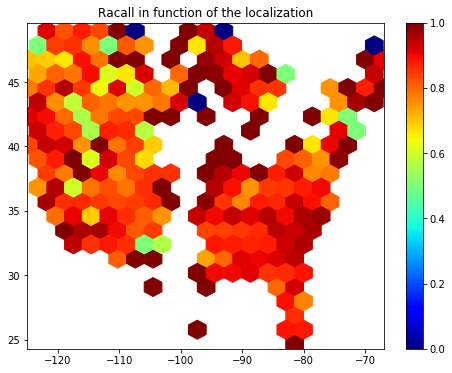

In [259]:
def mapplotRecall(df):
    gridsize=20
    plt.hexbin(df['lon'].values, df['lat'].values, df['truth'].values,
               gridsize=gridsize, reduce_C_function=np.mean, cmap=cm.jet)
    cb = plt.colorbar()
    plt.title('Racall in function of the localization')
    ax = plt.gca()
    ax.set_xlim((-125,-66.9))
    ax.set_ylim((24.3,49.6))
    plt.show()
    
tp_df['truth'] = 1
fp_df['truth'] = 0
recall_df = pd.concat([tp_df,fp_df])
mapplotRecall(recall_df)

There is no example of fires in some part of the US in my test set. Also, it is likely than the hexagons with 0 or 1 recall have very few examples, maybe only 1. It would be interesting to use a bigger test set. Also, it would be interesting to use fake fires that have the same geographical distribution as real fires.

### Create fake fires with a better geographical distribution

In [266]:
def createfake2(firepredict):
    s = len(firepredict)
    lon = firepredict['lon'].sample(n=s,replace=True)
    lat = firepredict['lat'].sample(n=s,replace=True)
    t = firepredict['tarray'].sample(n=s,replace=True)
    display(lon.head())
    display(lat.head())
    display(t.head())
    fakefire = pd.concat([lon,lat,t], axis=0)
    display(fakefire.head())
    fakefire['tarray'] = fakefire['tarray'].astype(int)
    display(fakefire.head())

    fakefire['day'] = fakefire['tarray'].apply(lambda x: (pd.Timedelta(x,'D') + pd.to_datetime('1992-01-01')).dayofyear)

    # get xybin
    lonarray = (fakefire['lon'].values - affine[2])//affine[0]
    latarray = (fakefire['lat'].values - affine[5])//affine[4]
    fakefire['xybinarray'] = np.vectorize(findxybin,otypes=[int])(lonarray,latarray)

    fakefire = moddf(fakefire)

    # align columns
    firepredict, fakefire = firepredict.align(fakefire,axis=1,copy=False)
    
    fakefire['fire']=False
    firepredict['fire']=True
    return pd.concat([fakefire,firepredict])

train_df3 = createfake2(firepredict2)

,1mppt,1mtmax,1mtmean,1mtmin,1wppt,1wtmax,1wtmean,1wtmin,2wppt,2wtmax,...,day,lat,lon,sppt,stmax,stmean,stmin,tarray,xybinarray,fire
0,212.852909,31.920906,26.859937,21.798967,12.556818,33.267273,27.759596,22.251921,12.556818,33.233292,...,194,31.916100,-93.606125,0.000000,33.355820,27.997860,22.639908,559,3114,False
1,23.851546,1.012683,-4.075292,-9.163267,14.092819,3.430948,-1.329994,-6.090935,19.170092,3.878981,...,86,47.820920,-95.681396,0.797727,1.836091,-0.156000,-2.148091,816,2837,False
2,69.139601,26.848784,19.752119,12.655455,0.000000,30.936257,23.020556,15.104858,4.496700,29.530043,...,134,31.532200,-88.098900,0.000000,33.623905,23.244848,12.865801,2325,3703,False
3,4.216500,34.746071,28.353528,21.960984,2.389600,32.991185,25.832736,18.674287,2.389600,34.042986,...,249,34.052600,-91.021605,0.000000,32.303097,24.094398,15.885699,1344,3381,False
4,69.988097,15.758184,9.703984,3.649784,31.949199,19.637372,13.107371,6.577372,44.842399,17.047943,...,44,35.333300,-94.795200,0.000000,10.950998,4.566850,-1.817300,2600,2965,False
5,15.865500,1.990010,-3.095302,-8.180613,0.967700,4.178757,-1.042293,-6.263343,0.967700,6.110986,...,83,43.366665,-88.708162,0.655200,7.407000,-0.406050,-8.219100,1543,3632,False
6,207.499707,33.038139,27.025745,21.013351,168.677406,30.244143,25.704435,21.164729,189.642407,32.879836,...,240,34.379400,-81.433600,30.050203,28.731300,24.534552,20.337797,1335,4319,False
7,17.227699,13.302271,5.307737,-2.686797,4.650700,17.685171,9.173472,0.661771,10.861200,15.381778,...,79,36.006090,-110.468700,4.029600,13.782199,7.713449,1.644700,809,1220,False
8,75.750299,9.862226,4.834461,-0.193303,8.356500,15.616715,9.004793,2.392871,27.200401,12.050329,...,114,44.128590,-94.690000,0.632800,17.731701,11.633550,5.535400,479,2992,False
9,57.339999,3.956936,0.540081,-2.876774,30.820000,3.669286,0.708214,-2.252857,32.255000,0.978929,...,63,45.431300,-81.070833,7.710000,4.930000,1.367500,-2.195000,2619,4342,False


In [267]:
X3, X_test3, y3, y_test3 = train_test_split(
    train_df3.drop('fire',axis=1), train_df3['fire'], test_size=0.02, shuffle=True)
X_train3, X_val3, y_train3, y_val3 = train_test_split(
    X3, y3, test_size=0.1, shuffle=True)

trials4 = Trials()
hypersearch2(X_train3.drop(['tarray','xybinarray'],axis=1), X_val3.drop(['tarray','xybinarray'],axis=1),
             y_train3, y_val3, trials4, 10)

269.7114591598511 0.166421
247.16041946411133 0.162528
248.03481698036194 0.17569
156.21354985237122 0.226227
769.9106481075287 0.16108
314.03228783607483 0.158989
676.883490562439 0.161587
134.5130536556244 0.177003
190.08842206001282 0.223303
240.47117066383362 0.170223
{'colsample_bylevel': 0.5325364120206801, 'colsample_bytree': 0.5564311481310078, 'gamma': 0.8401130855157402, 'learning_rate': 0.05818335346261434, 'max_depth': 17, 'min_child_weight': 8.0, 'reg_alpha': 0.9706346822474644, 'reg_lambda': 0.9332255462807677, 'subsample': 0.9463461085191291}


[0]	validation_0-error:0.222896
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.211545
[2]	validation_0-error:0.212495
[3]	validation_0-error:0.213971
[4]	validation_0-error:0.200683
[5]	validation_0-error:0.196772
[6]	validation_0-error:0.197695
[7]	validation_0-error:0.194382
[8]	validation_0-error:0.193197
[9]	validation_0-error:0.189648
[10]	validation_0-error:0.190318
[11]	validation_0-error:0.190553
[12]	validation_0-error:0.188797
[13]	validation_0-error:0.18648
[14]	validation_0-error:0.184923
[15]	validation_0-error:0.184108
[16]	validation_0-error:0.183321
[17]	validation_0-error:0.183384
[18]	validation_0-error:0.183583
[19]	validation_0-error:0.183167
[20]	validation_0-error:0.18199
[21]	validation_0-error:0.182316
[22]	validation_0-error:0.182479
[23]	validation_0-error:0.182361
[24]	validation_0-error:0.182407
[25]	validation_0-error:0.182361
[26]	validation_0-error:0.180822
[27]	validation_0-error:0.181185
[28]	validation_0-erro

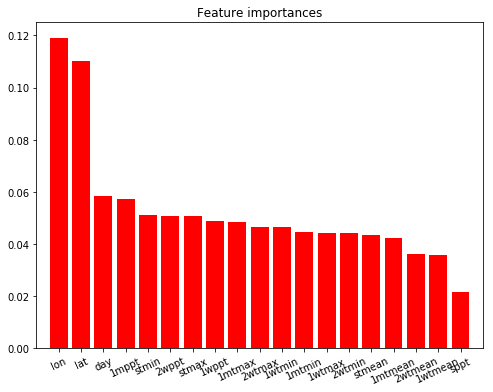

In [268]:
param={'colsample_bylevel': 0.7501177019888027, 'colsample_bytree': 0.8291070503829303, 'gamma': 0.3712264689410901, 'learning_rate': 0.07820296189339045, 'max_depth': 17, 'min_child_weight': 5.0, 'reg_alpha': 0.9998518175523757, 'reg_lambda': 0.5238219352181274, 'subsample': 0.6257283056660621}
clf3 = XGBClassifier(**param, nthread = -1, n_estimators=1000)   
fitandplot2(X_train3.drop(['tarray','xybinarray'],axis=1), X_val3.drop(['tarray','xybinarray'],axis=1), 
            y_train3, y_val3, clf3)